In [1]:
import scipy.io
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install --force-reinstall numpy==1.16.5

ERROR: Could not find a version that satisfies the requirement numpy==1.16.5 (from versions: none)
ERROR: No matching distribution found for numpy==1.16.5


In [3]:
df = pd.read_csv('/kaggle/input/all-faults-csv/all_faults.csv')

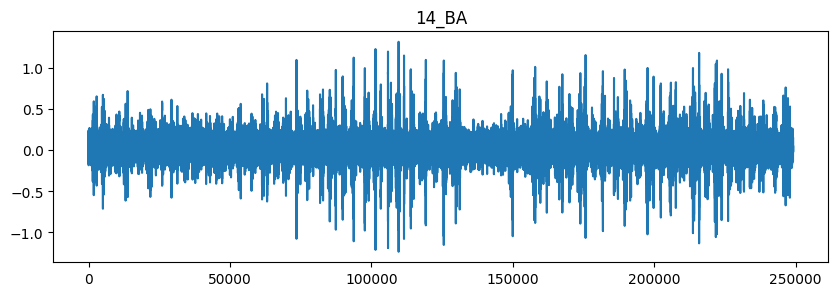

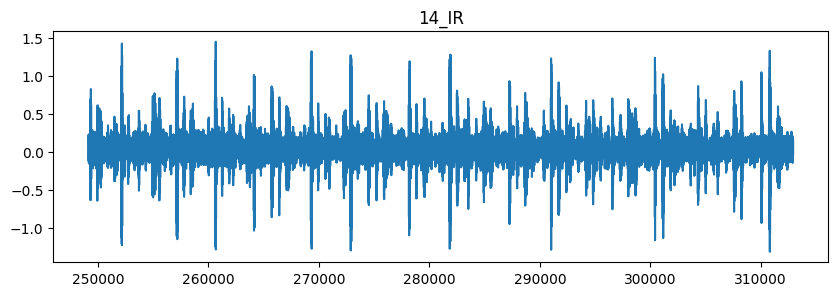

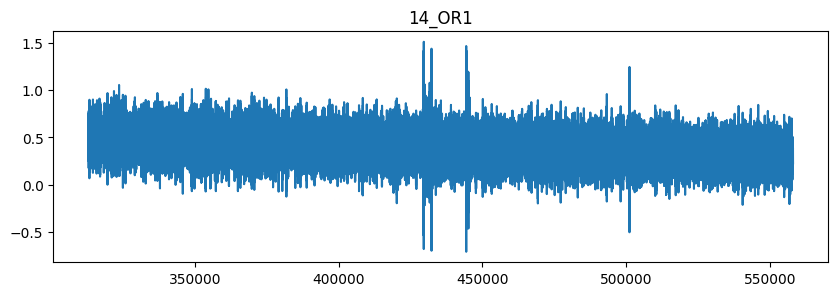

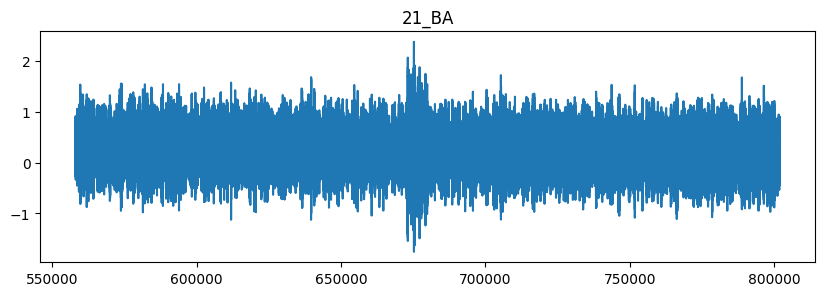

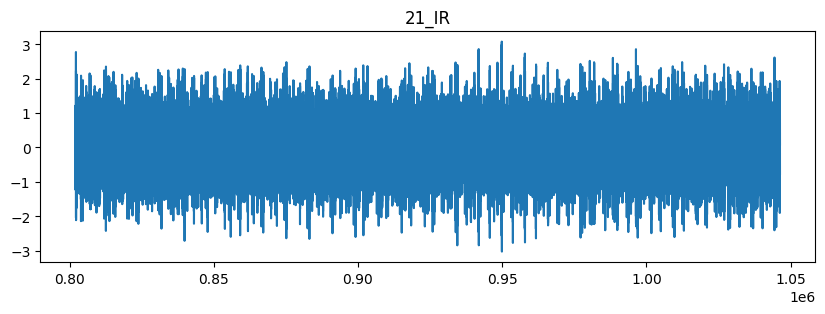

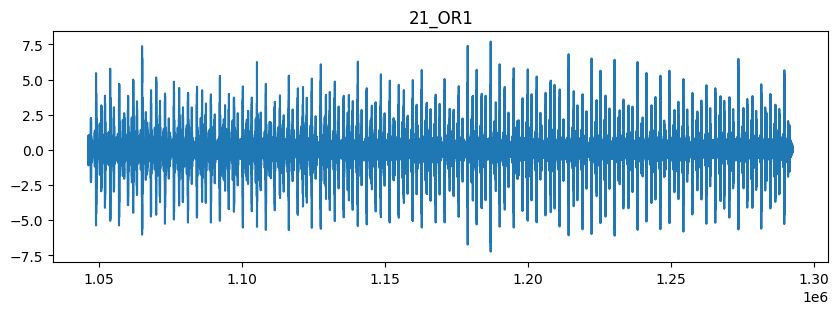

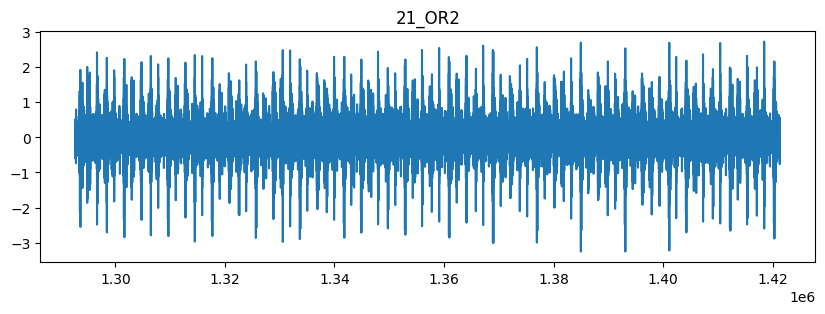

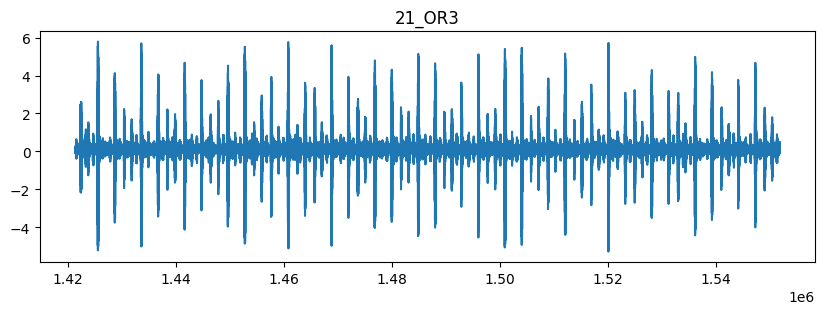

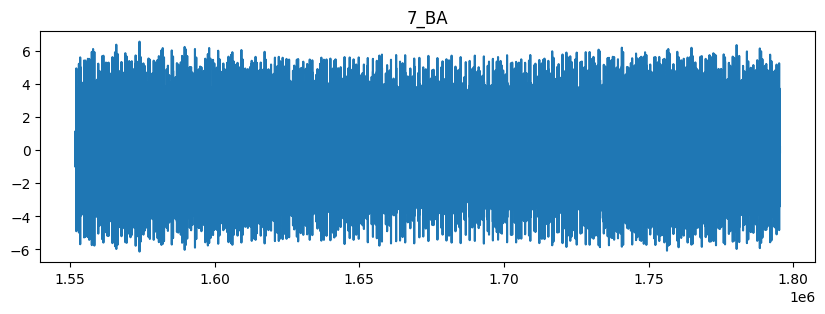

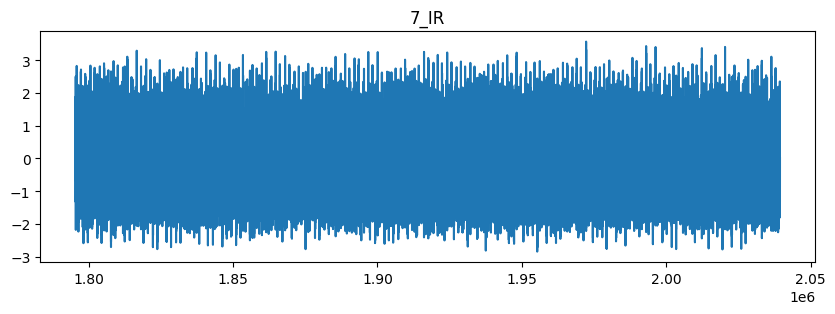

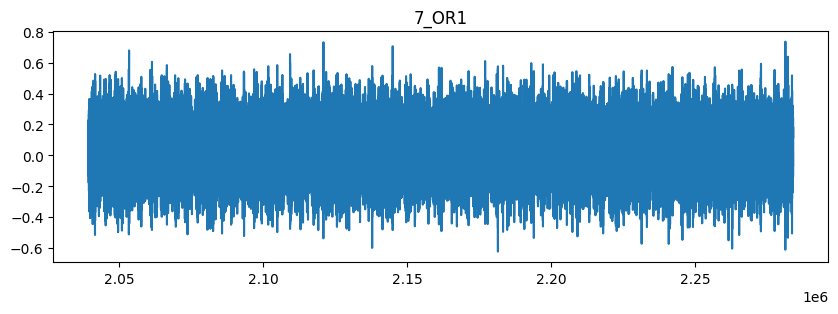

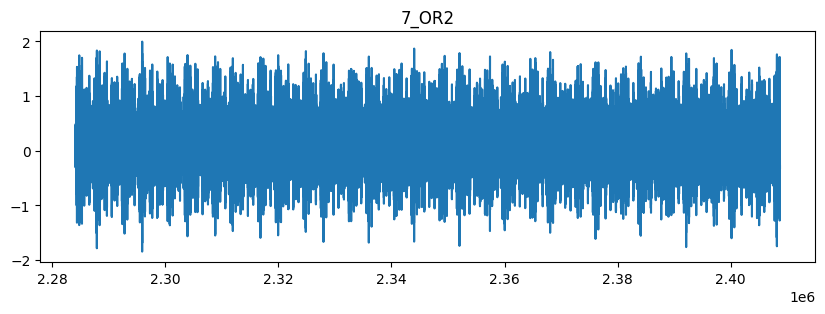

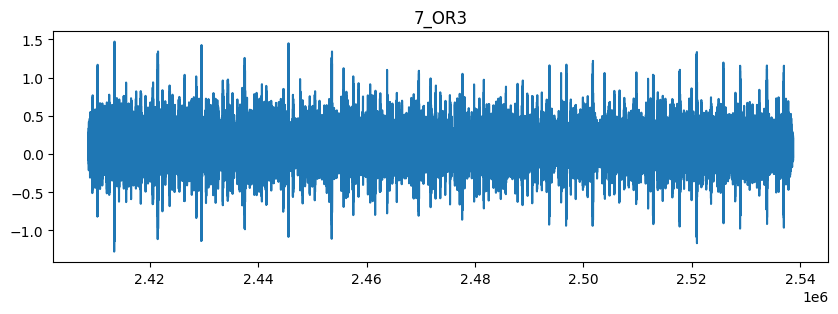

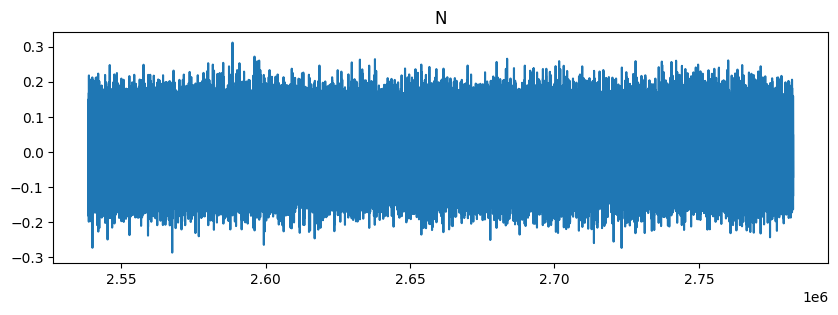

In [4]:
faults = df['fault'].unique()
for  f in faults:
    plt.figure(figsize=(10,3))
    plt.plot(df[df['fault']==f].iloc[:,0])
    plt.title(f)
    plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

win_len=784
stride=300

X=[]
Y=[]


for k in df['fault'].unique():
    
    df_temp_2 = df[df['fault']==k]
    
    for i in np.arange(0,len(df_temp_2)-(win_len),stride):
        temp = df_temp_2.iloc[i:i+win_len,:-1].values
        temp = temp.reshape((1,-1))
        X.append(temp)
        Y.append(df_temp_2.iloc[i+win_len,-1])
    
X=np.array(X)
X=X.reshape((X.shape[0],28,28,1))
#X = np.repeat(X, 3, axis=3) # To repeat into 3 chanel format


Y=np.array(Y)
encoder= LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
OHE_Y = to_categorical(encoded_Y)

In [6]:
X.shape

(9246, 28, 28, 1)

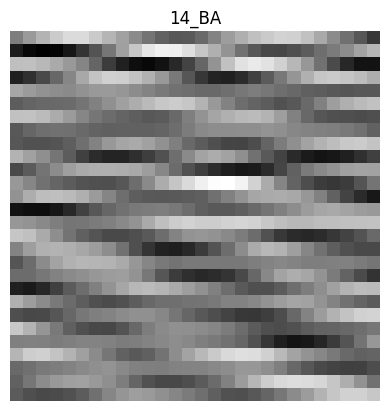

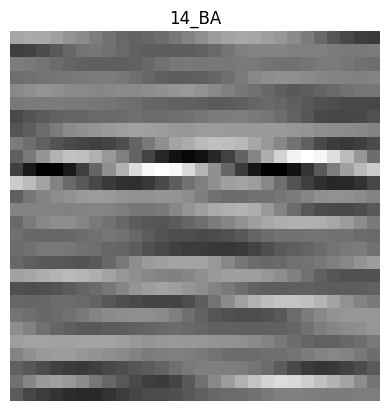

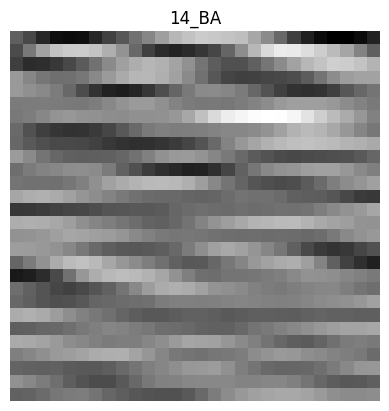

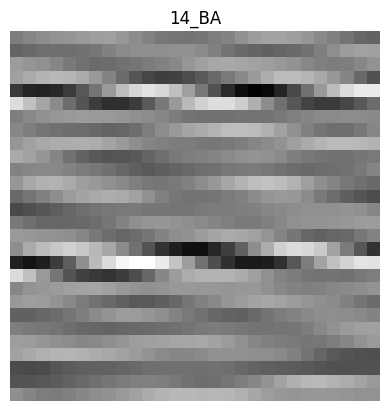

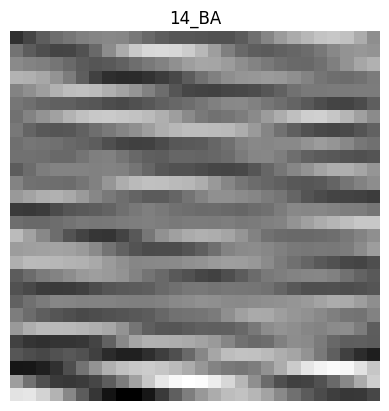

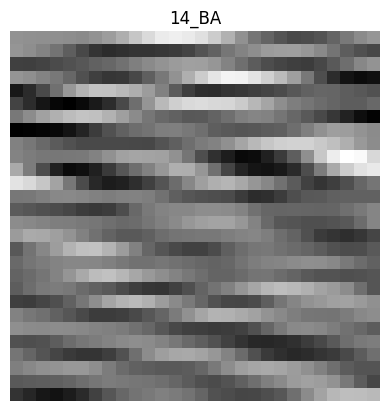

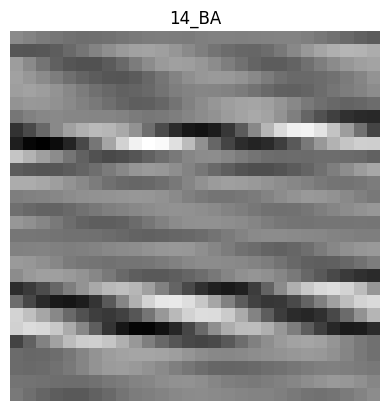

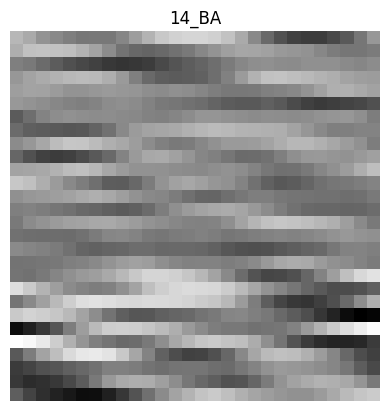

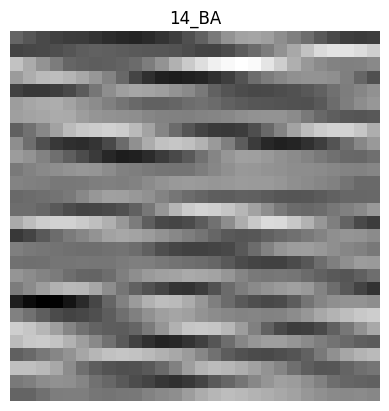

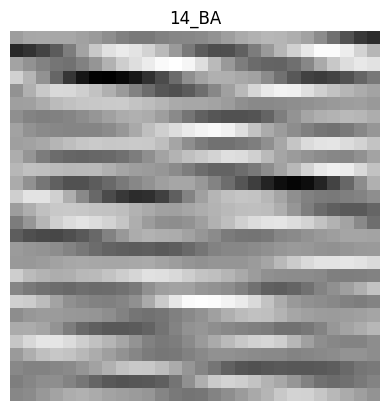

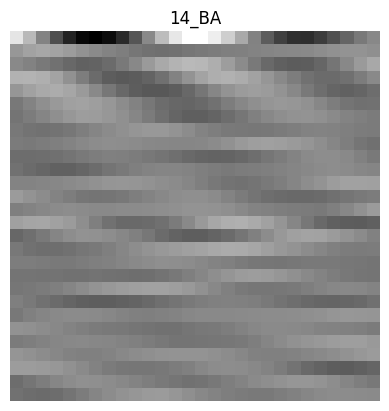

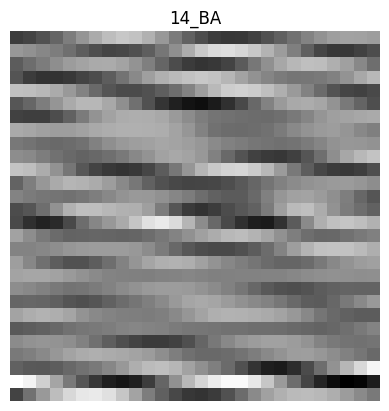

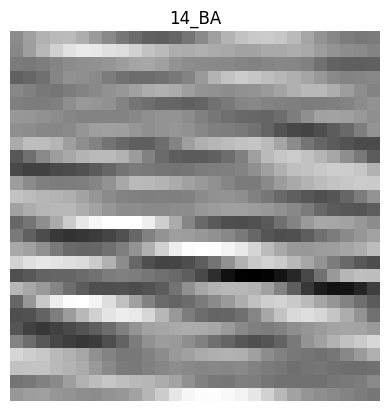

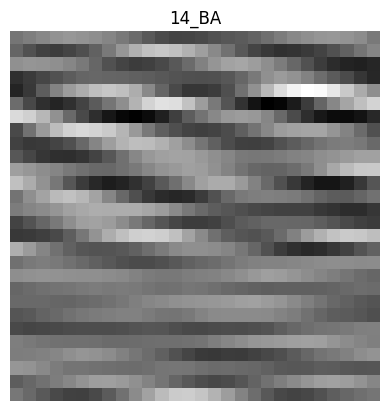

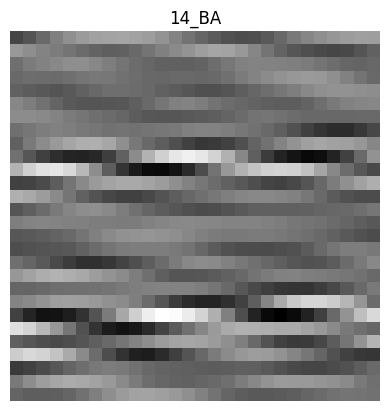

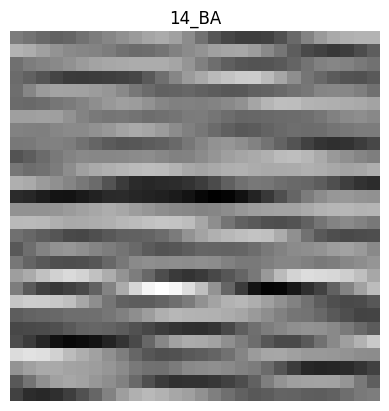

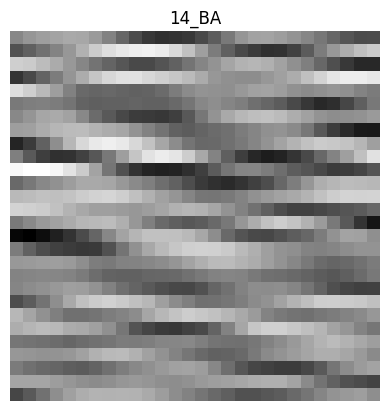

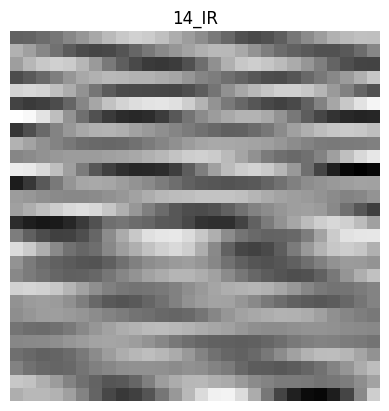

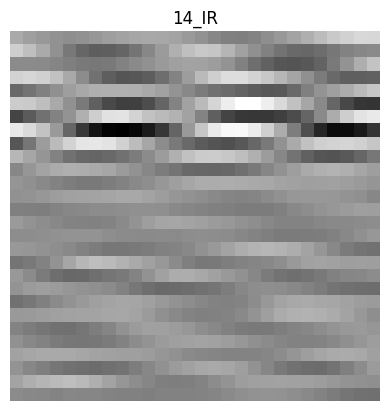

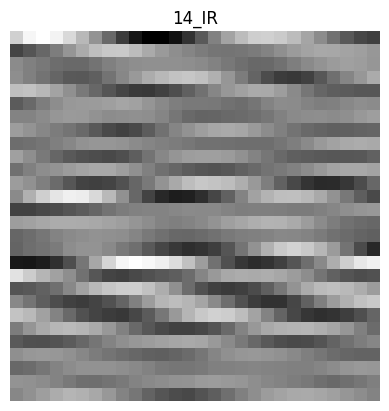

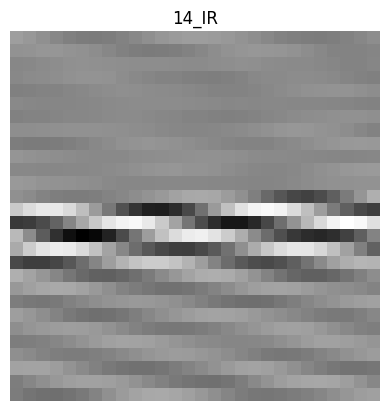

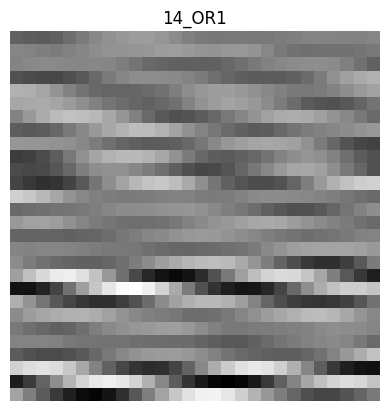

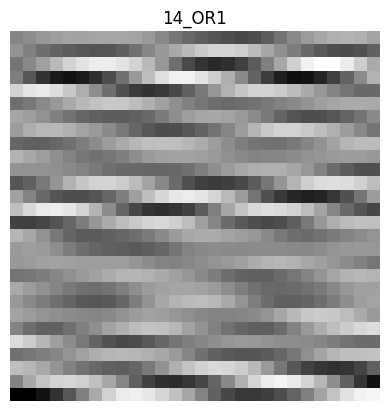

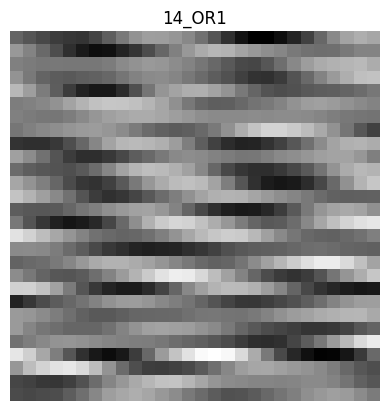

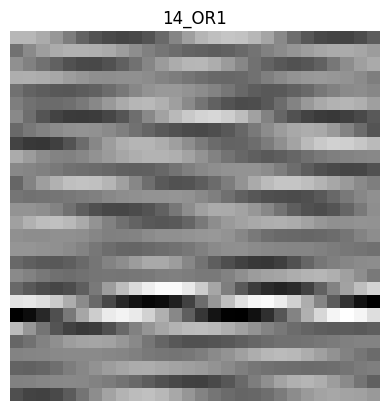

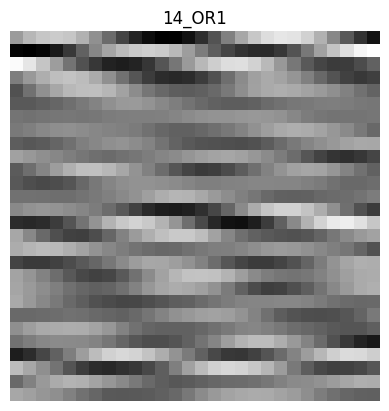

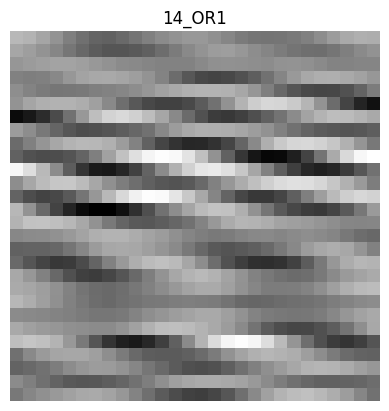

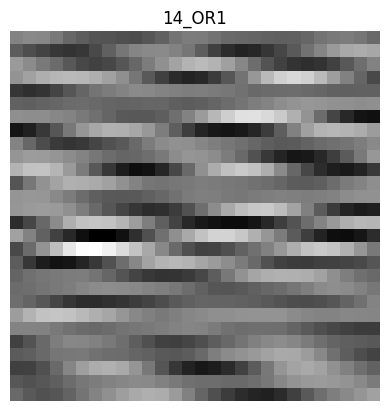

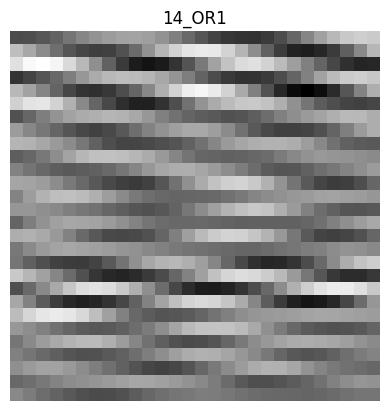

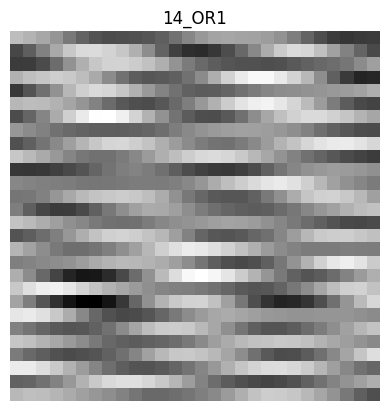

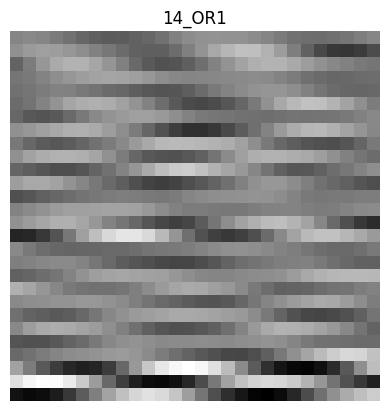

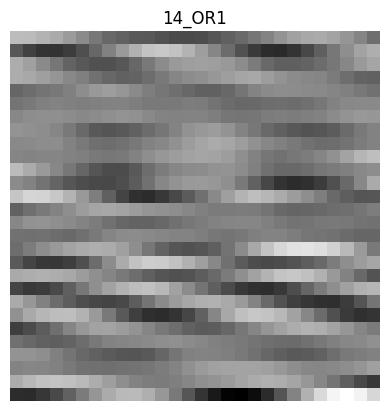

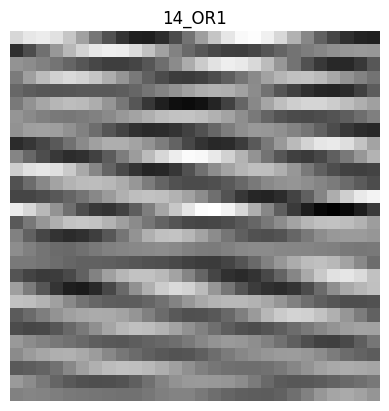

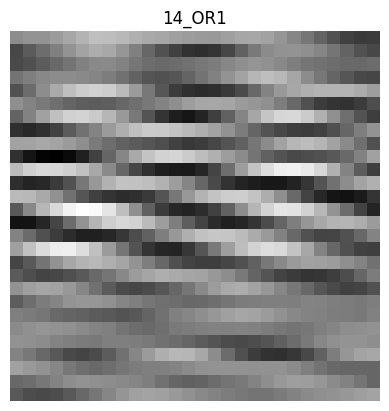

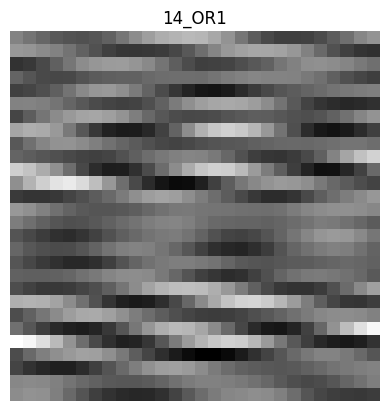

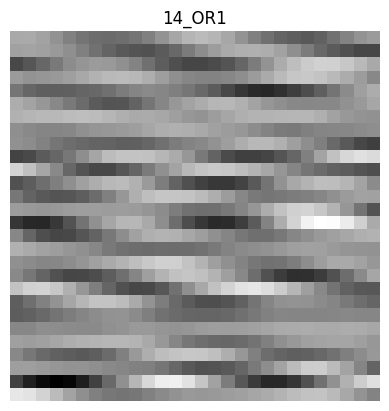

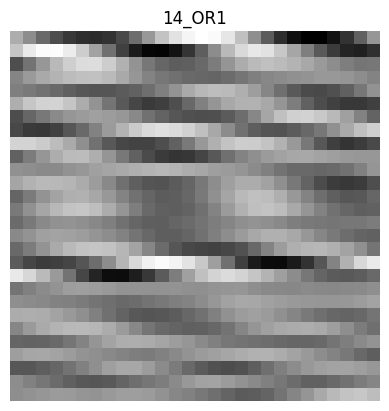

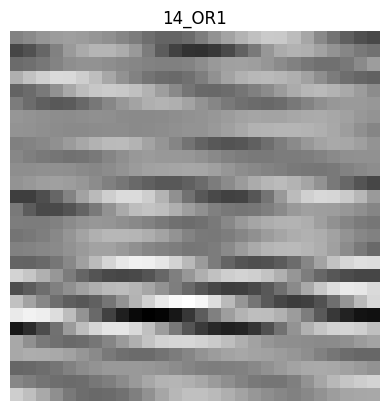

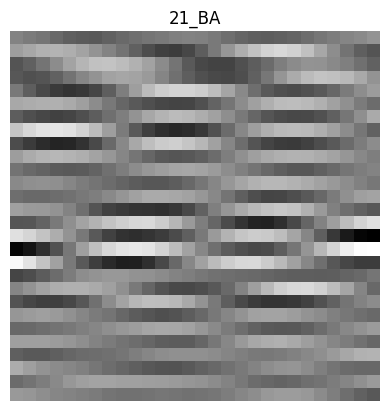

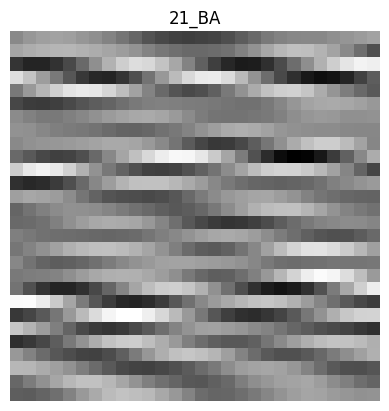

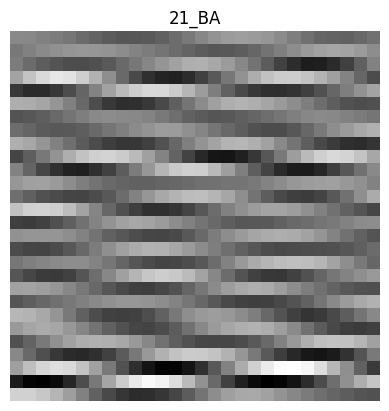

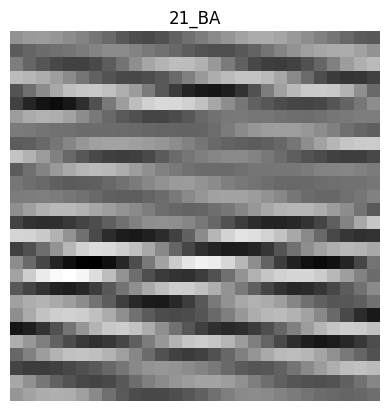

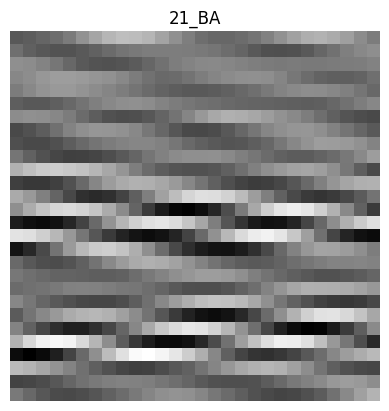

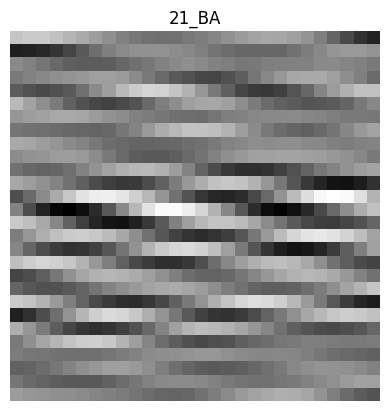

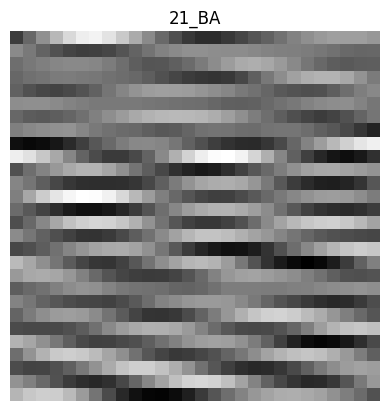

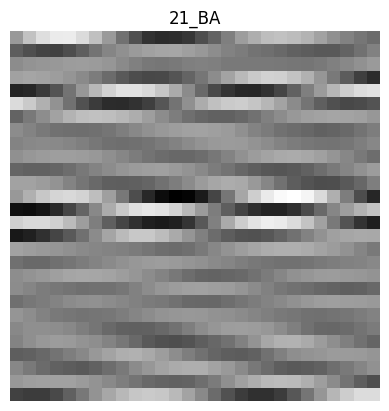

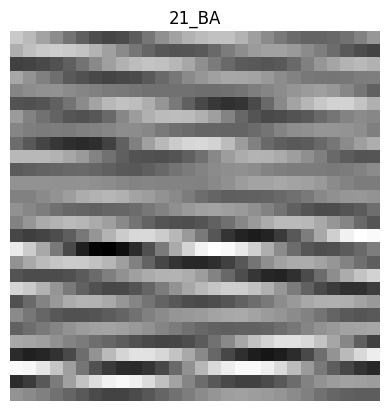

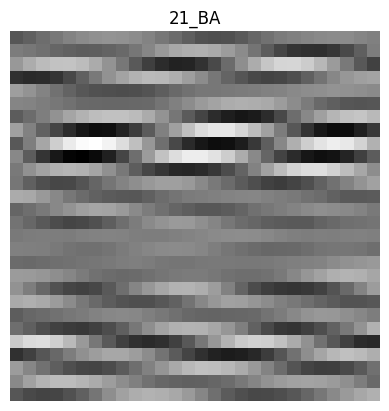

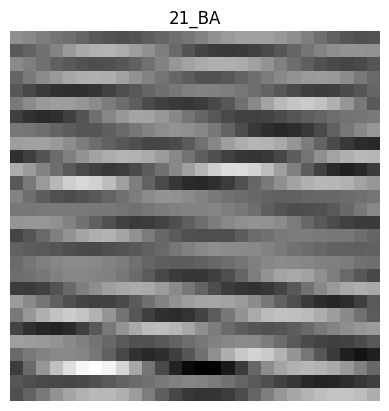

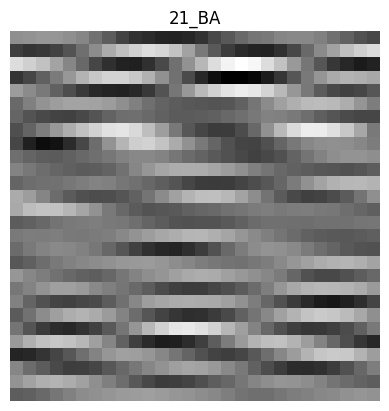

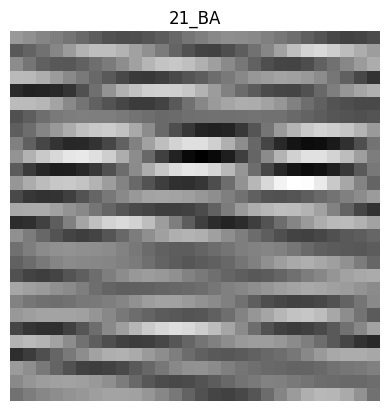

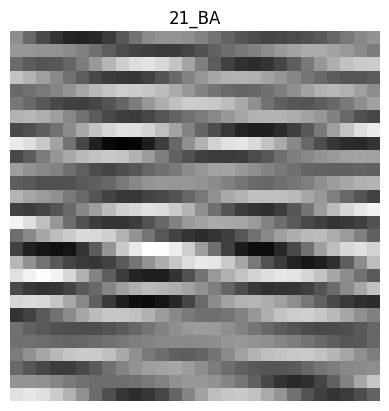

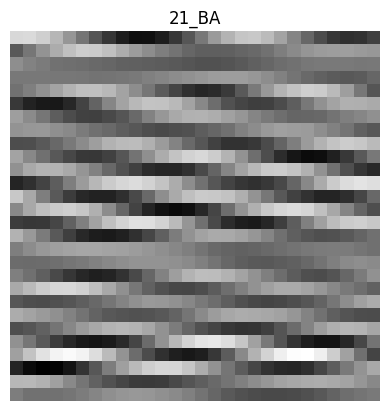

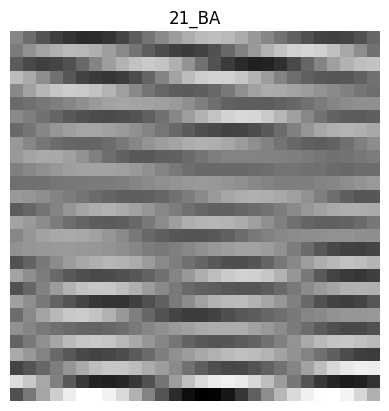

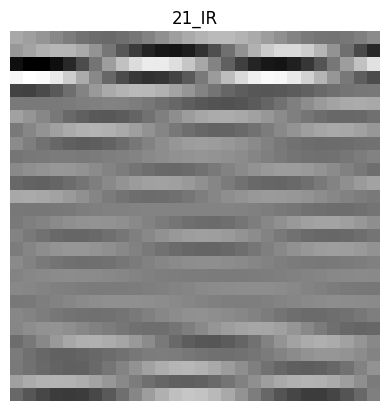

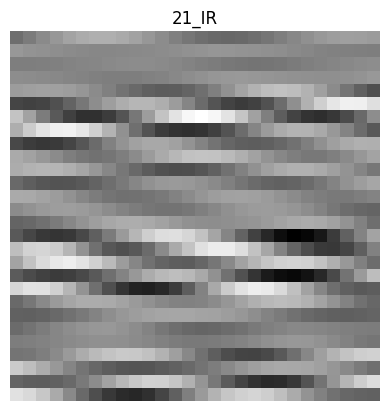

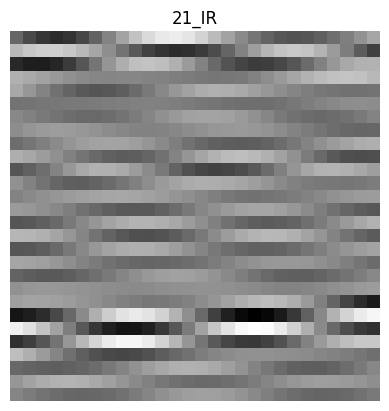

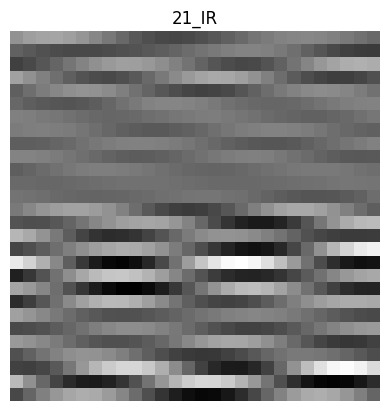

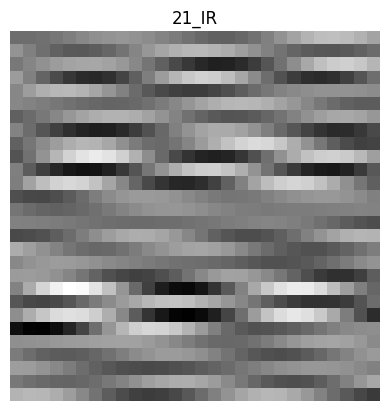

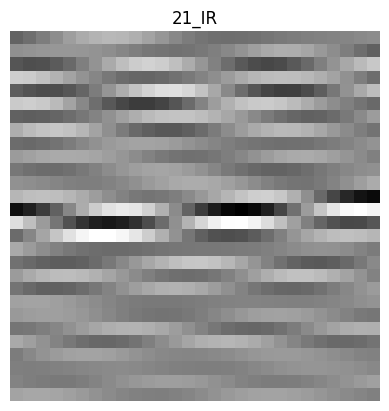

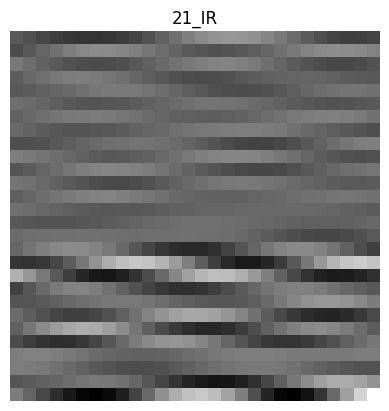

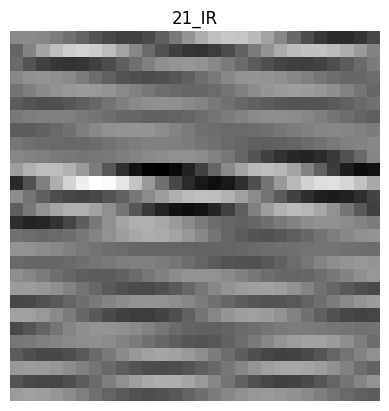

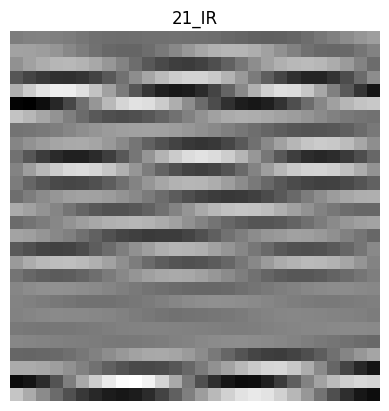

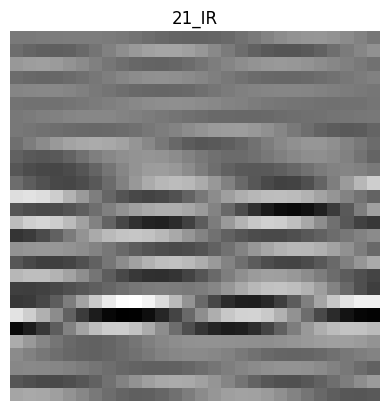

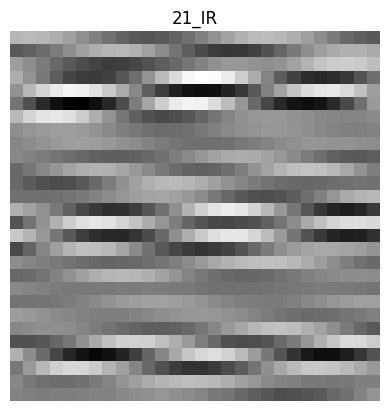

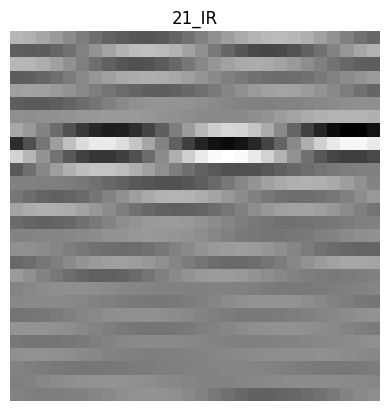

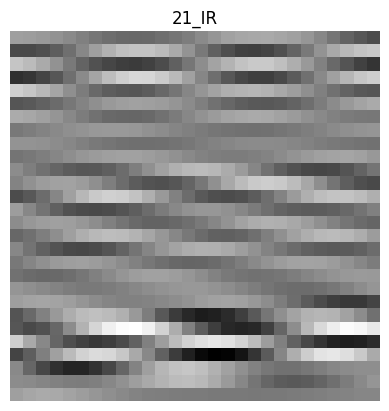

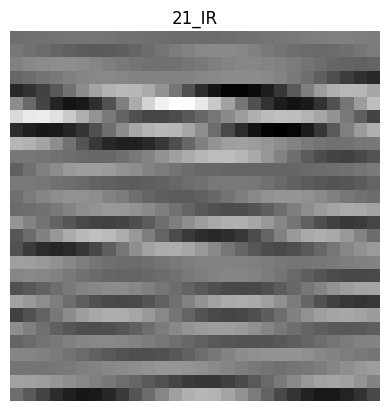

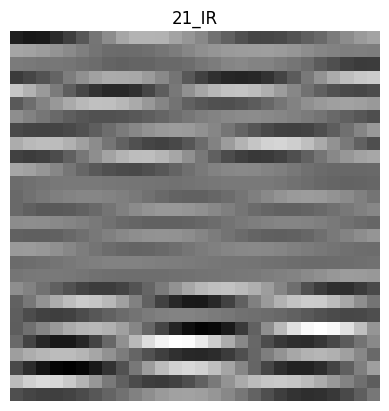

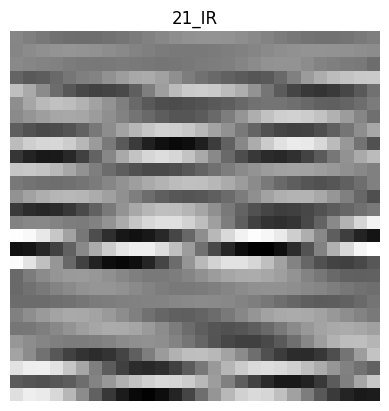

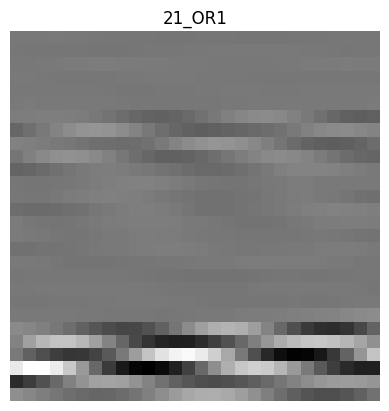

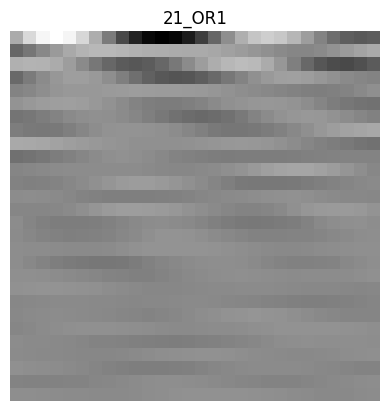

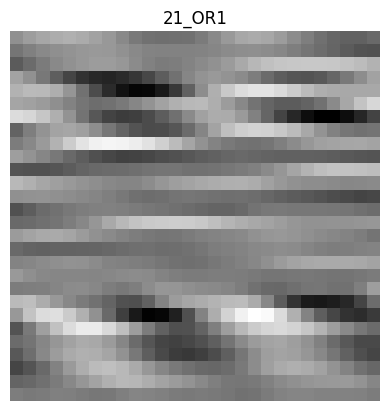

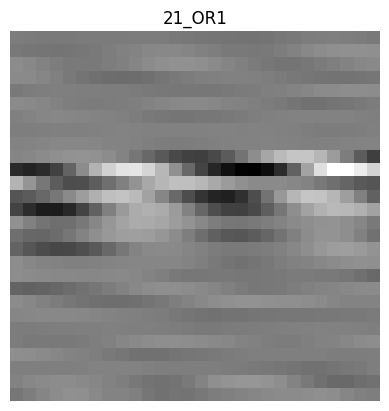

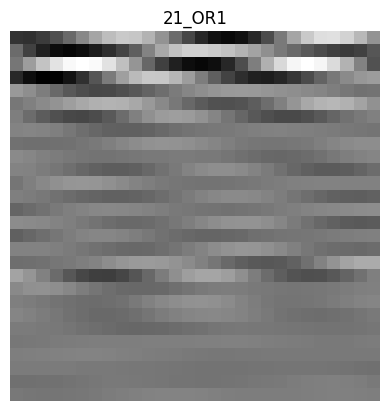

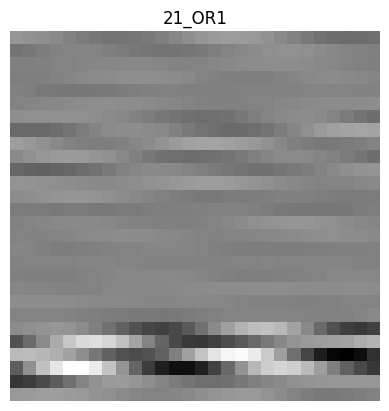

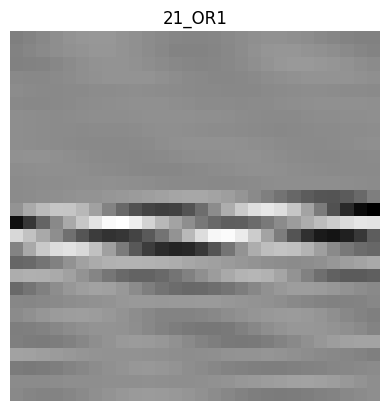

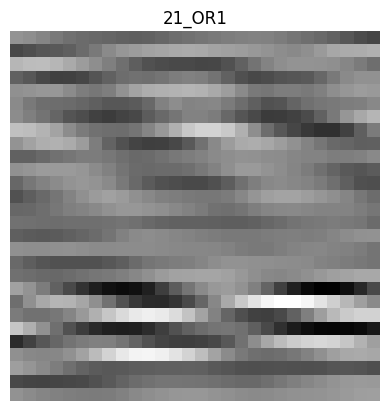

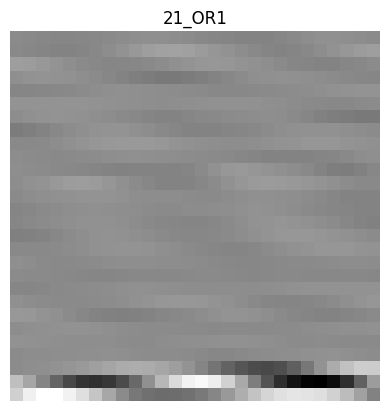

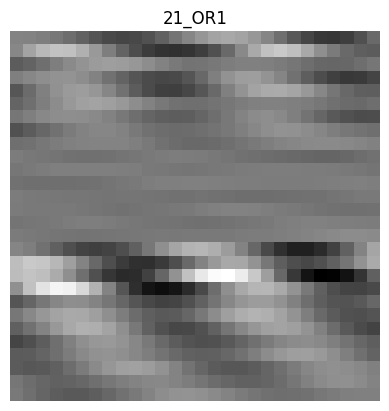

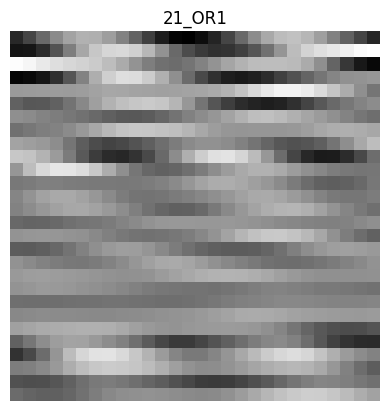

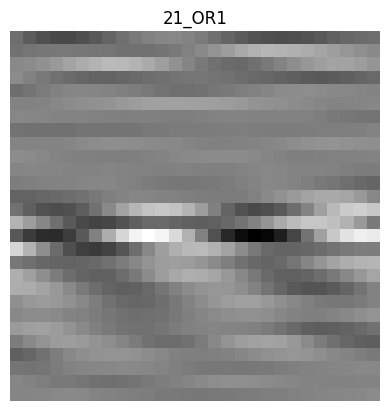

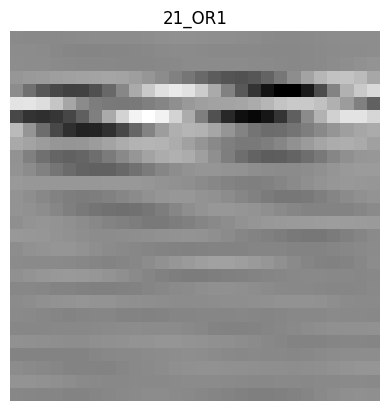

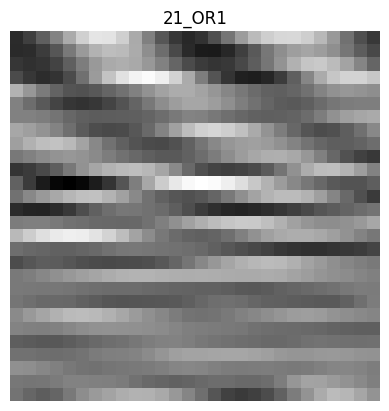

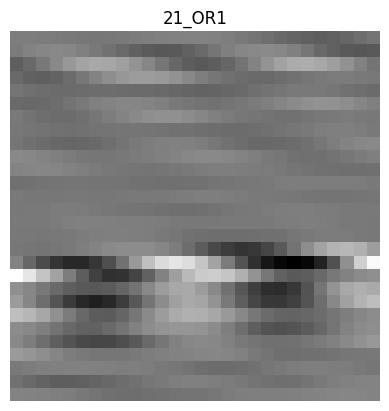

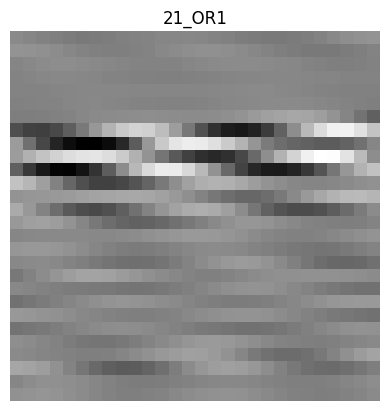

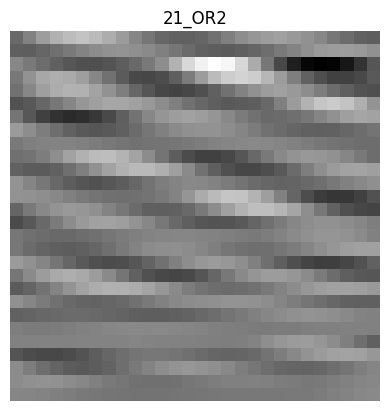

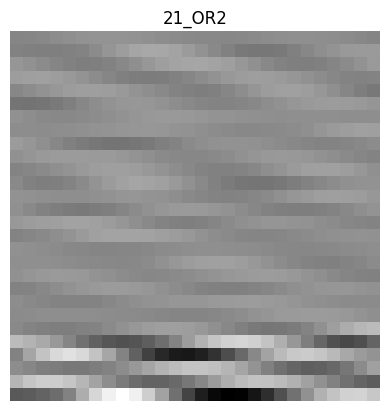

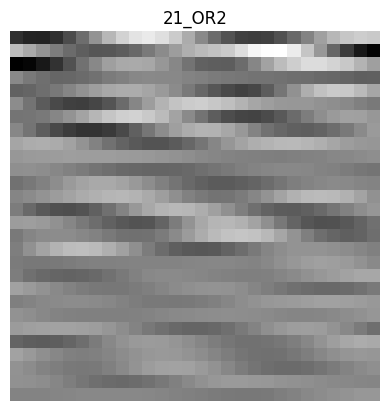

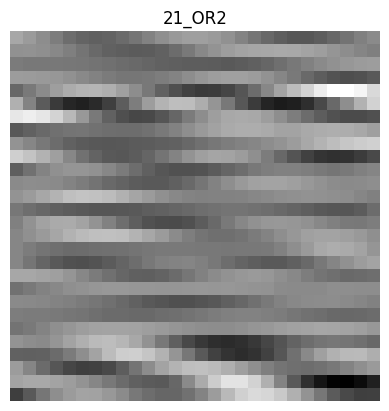

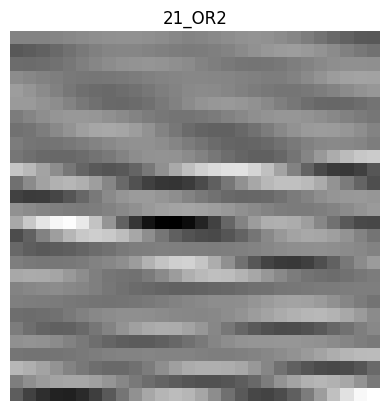

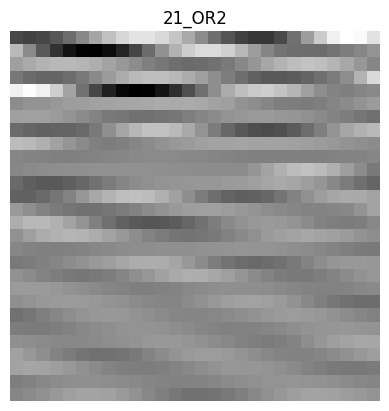

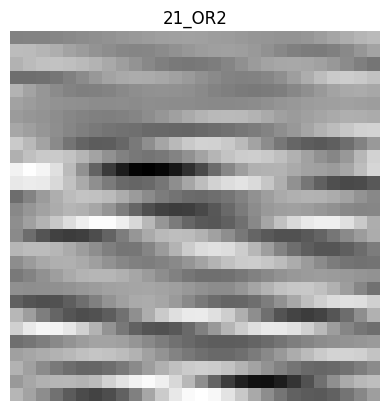

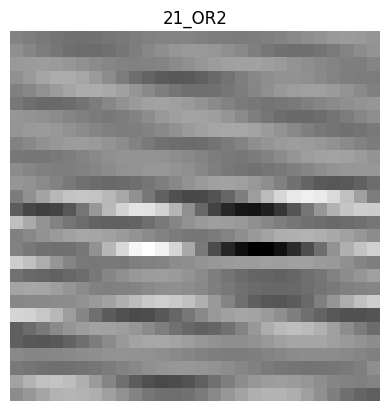

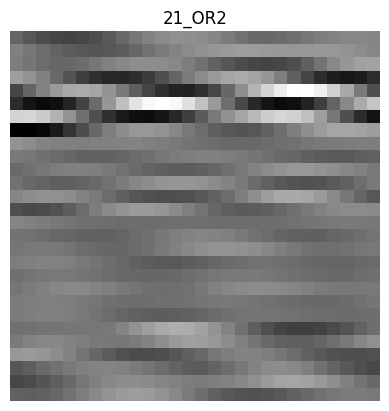

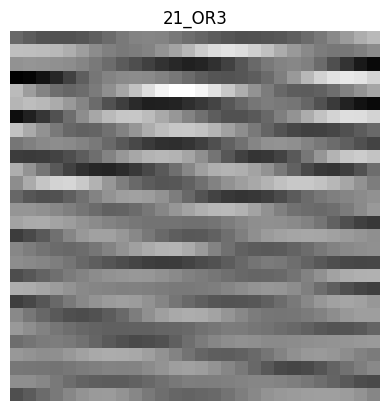

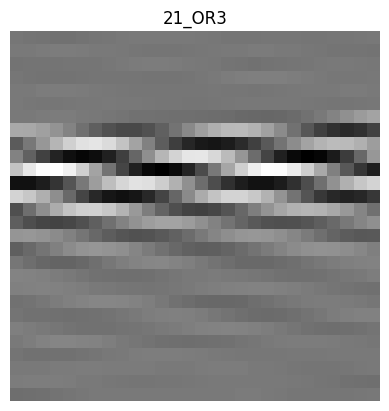

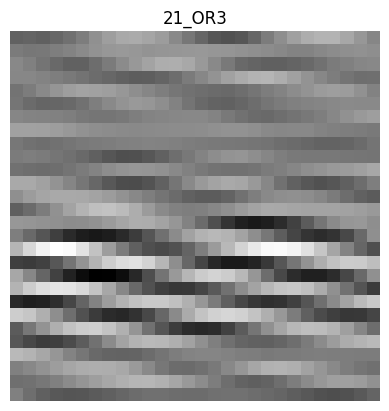

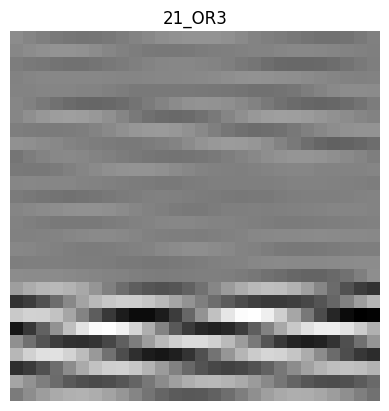

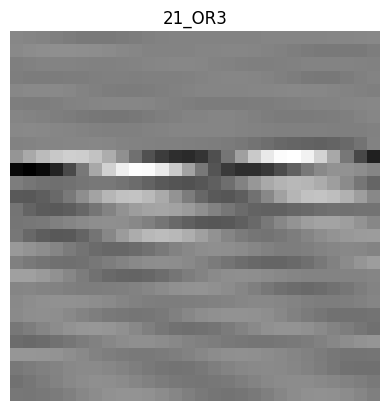

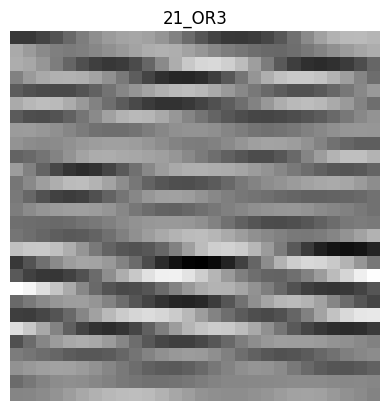

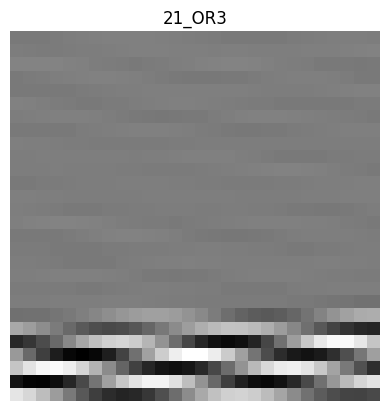

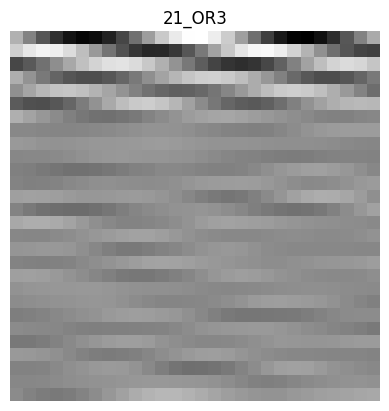

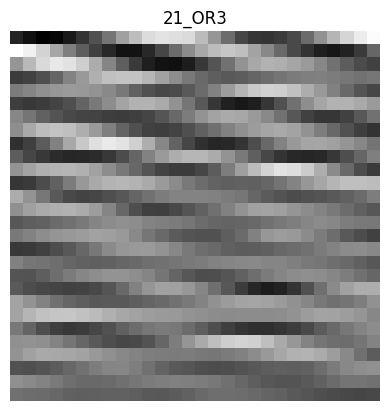

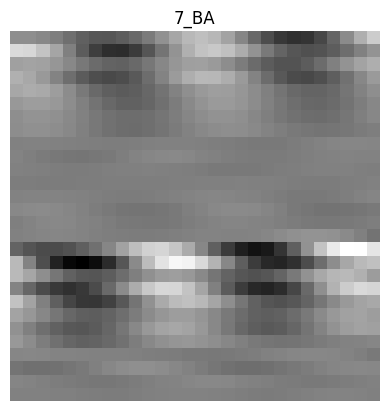

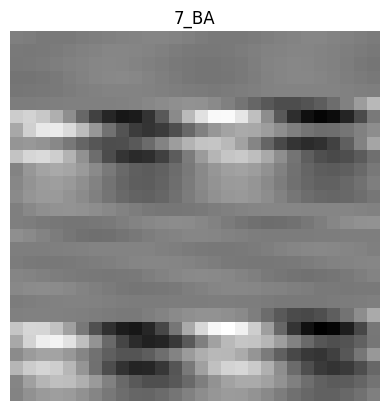

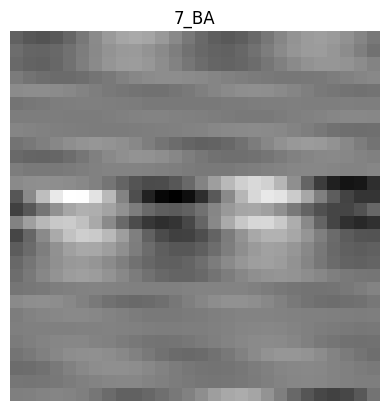

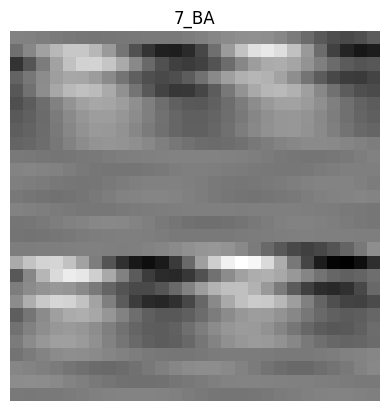

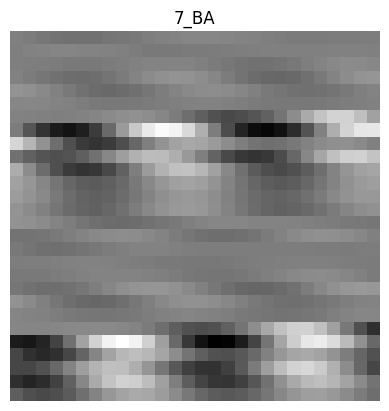

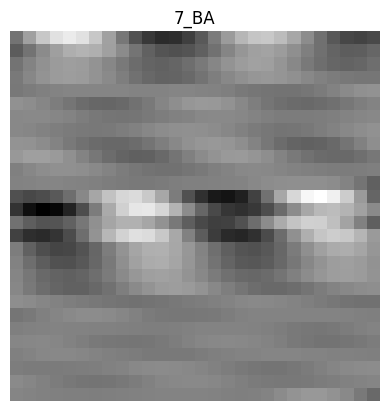

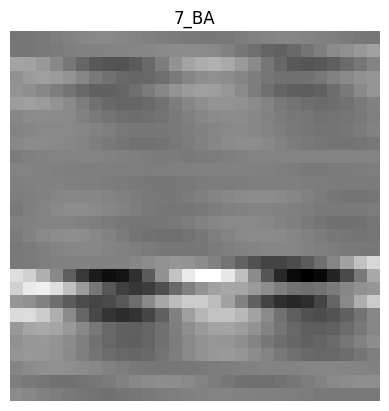

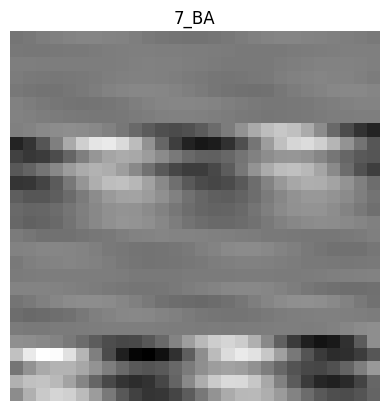

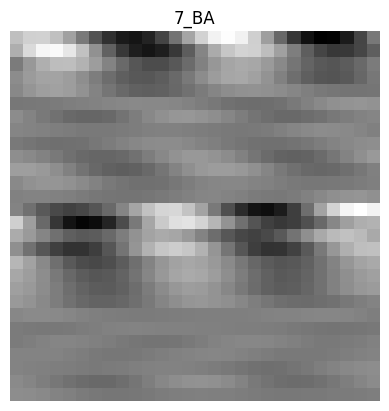

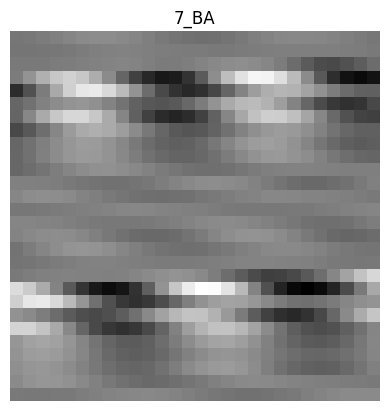

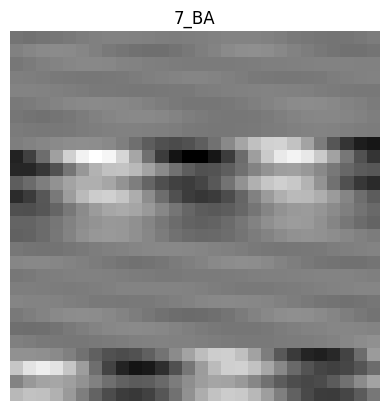

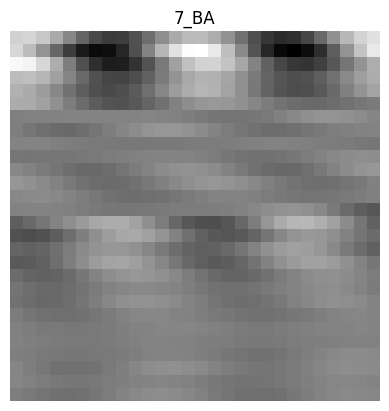

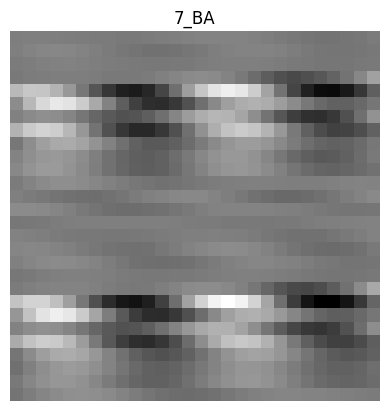

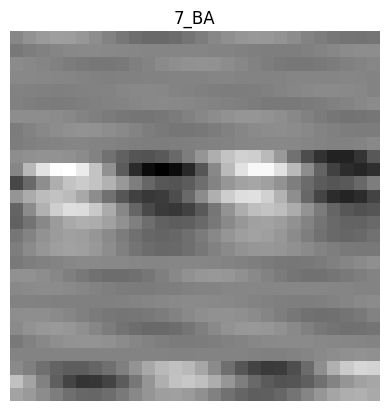

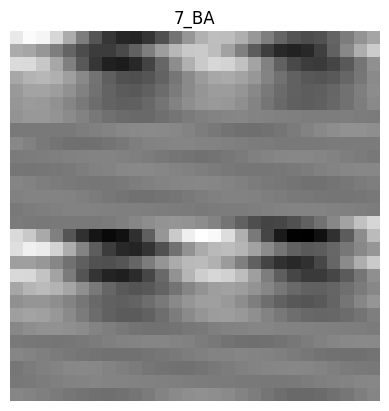

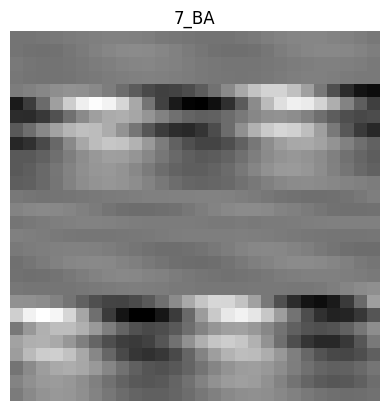

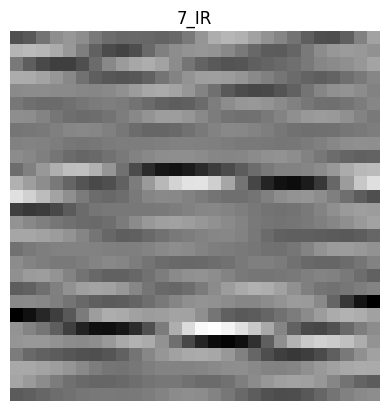

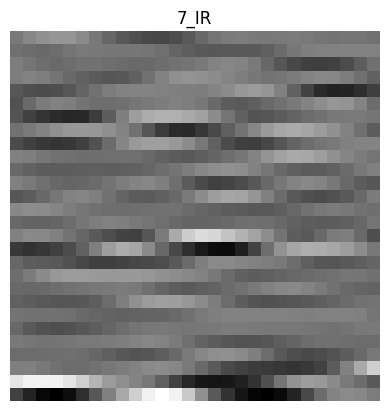

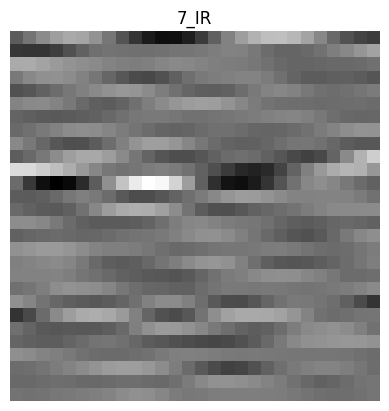

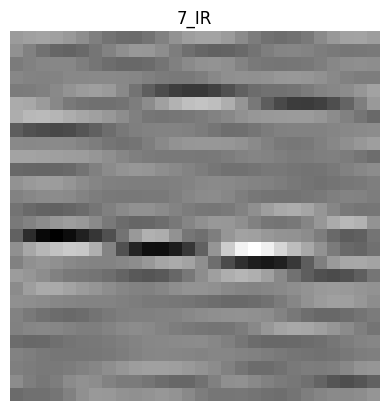

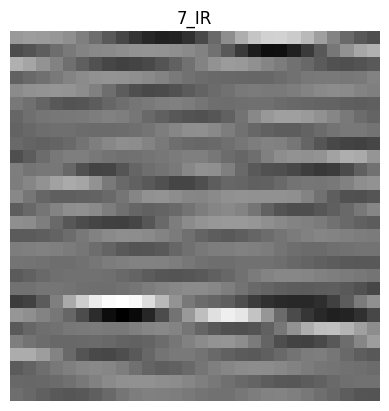

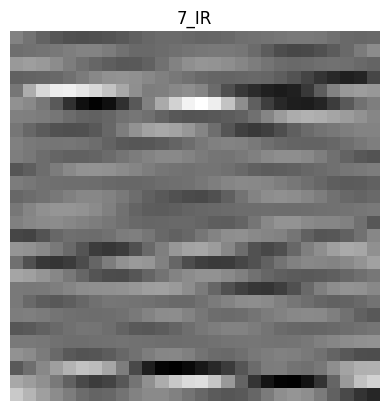

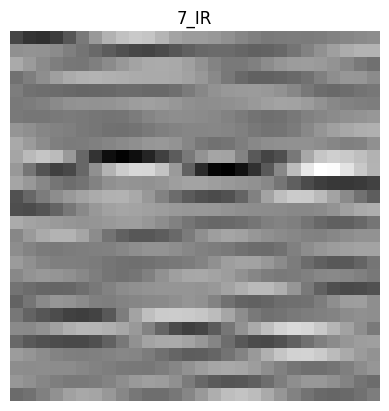

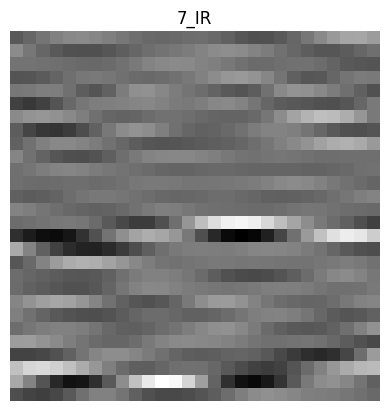

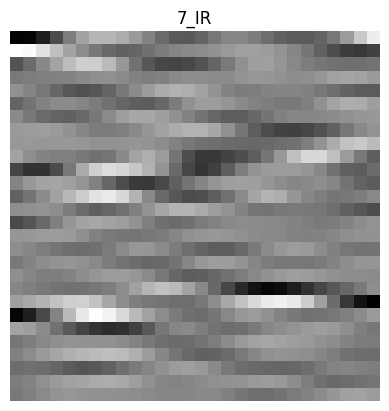

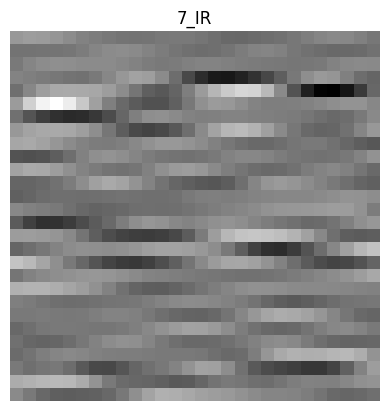

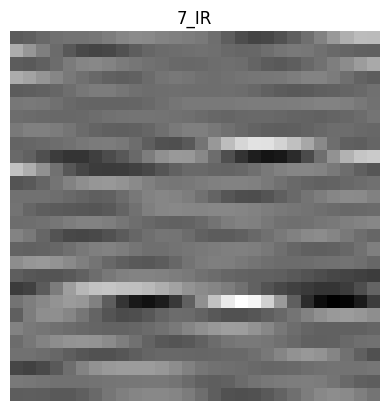

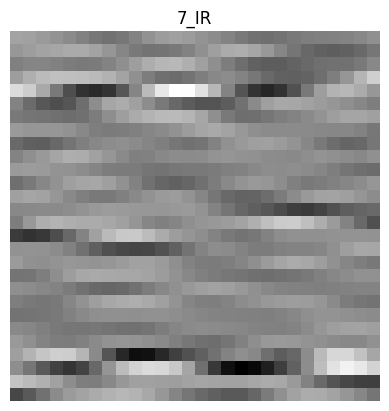

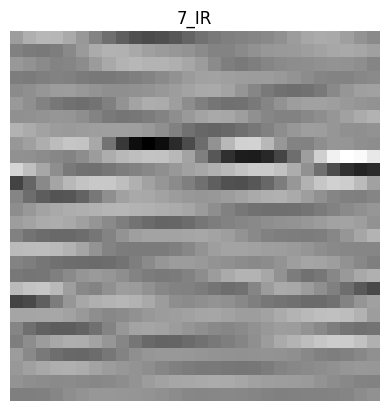

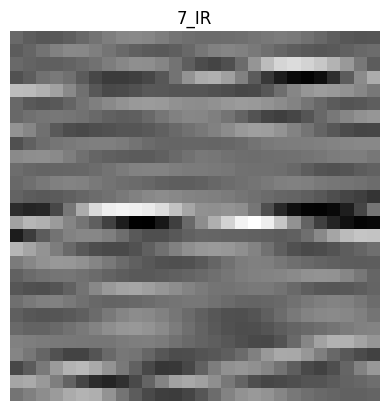

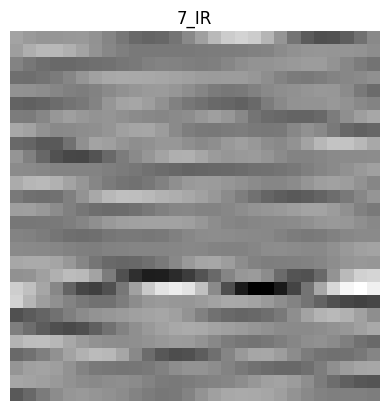

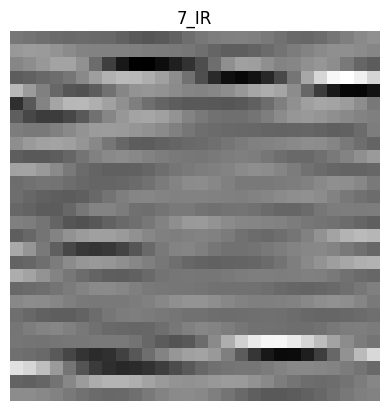

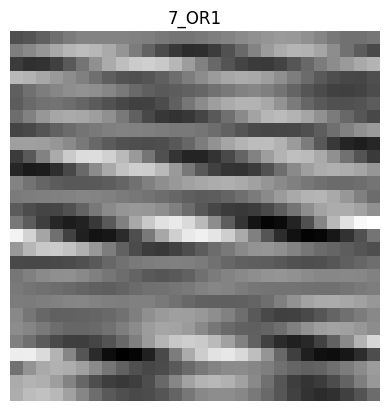

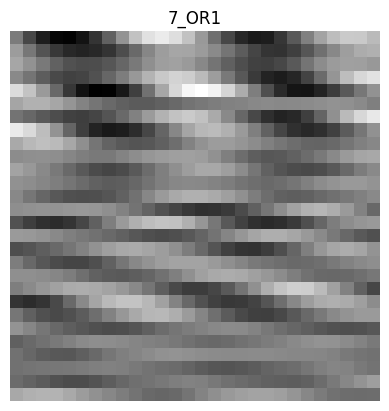

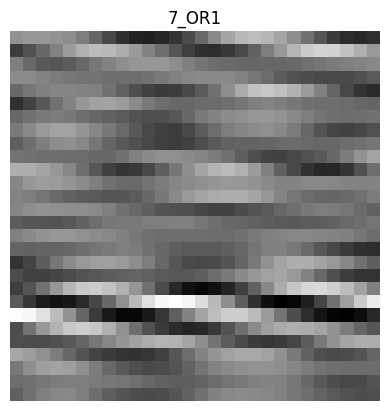

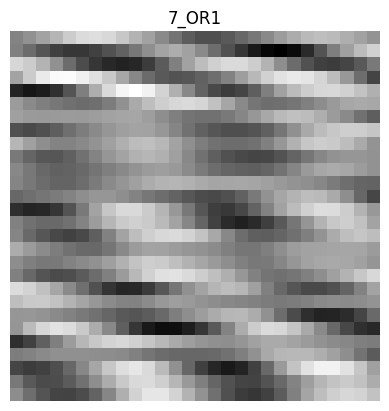

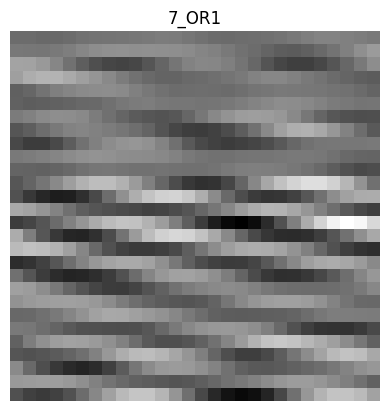

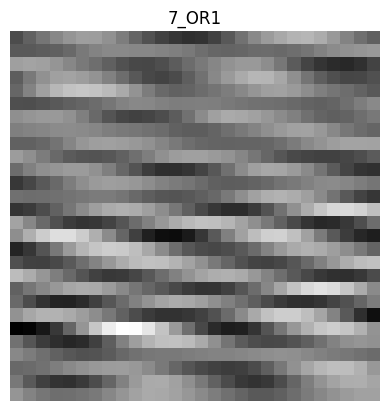

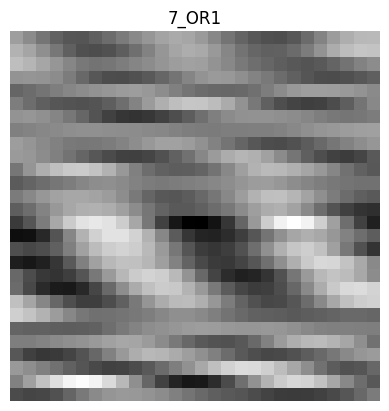

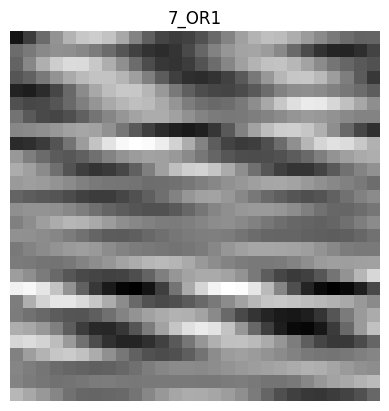

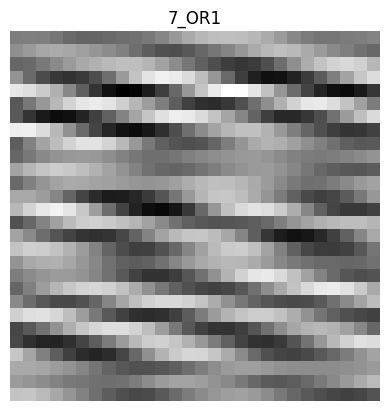

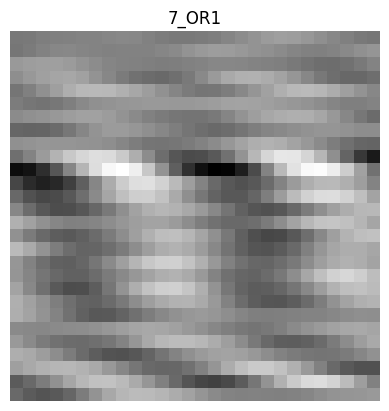

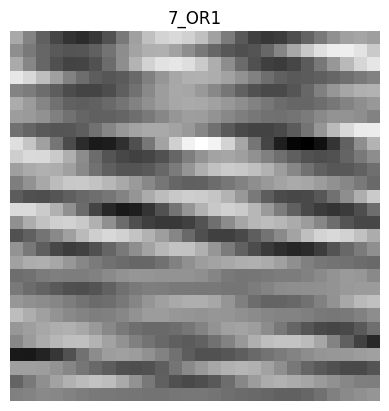

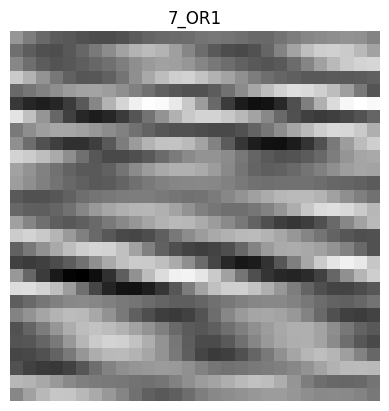

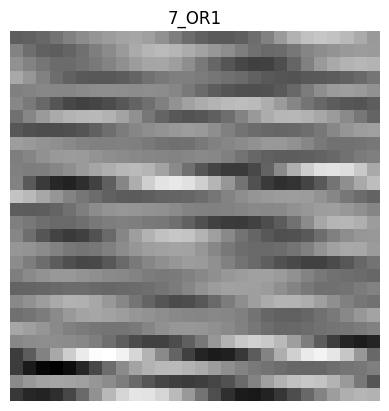

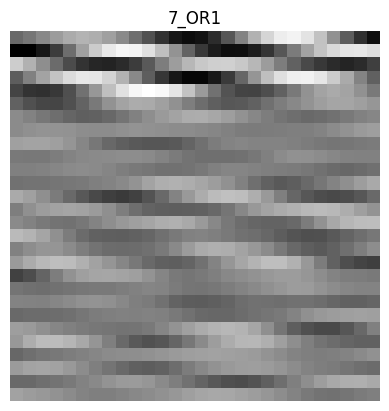

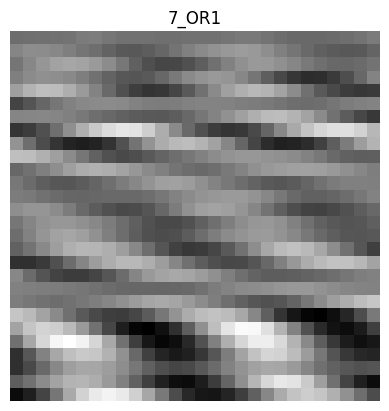

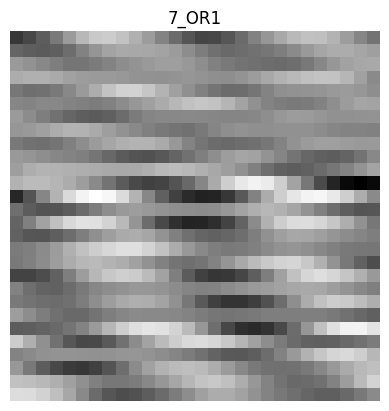

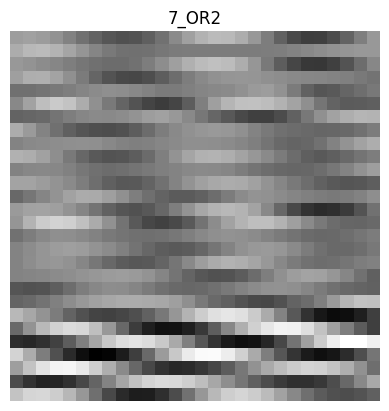

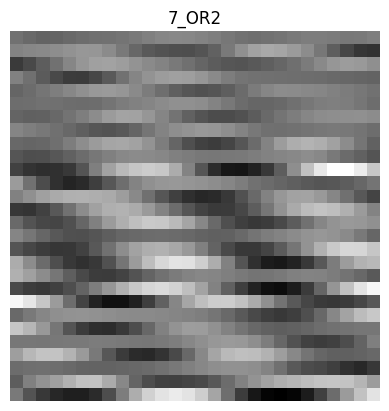

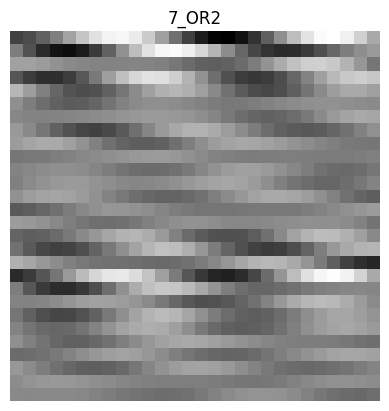

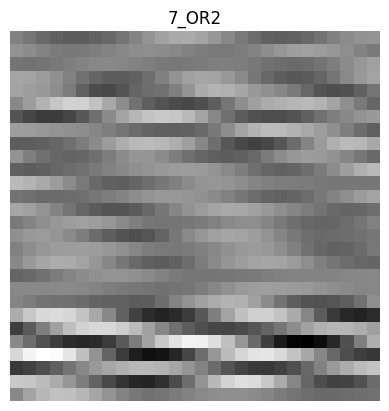

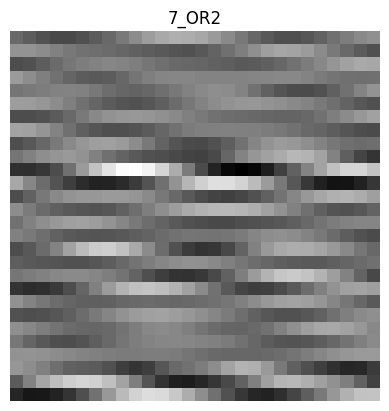

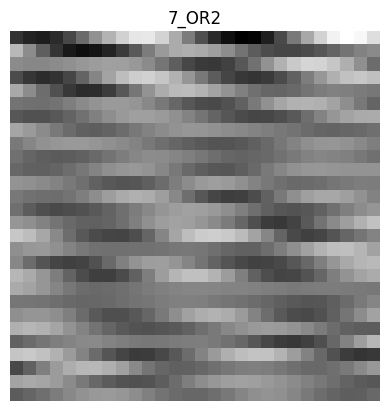

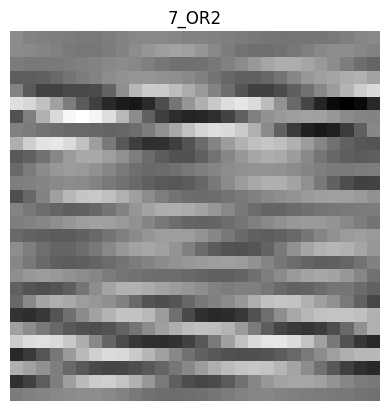

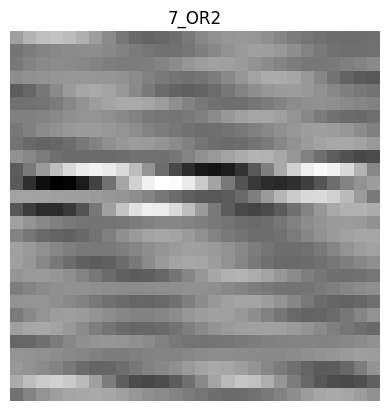

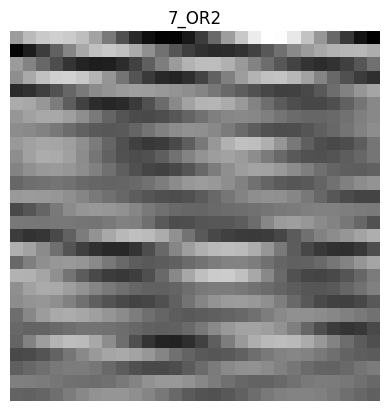

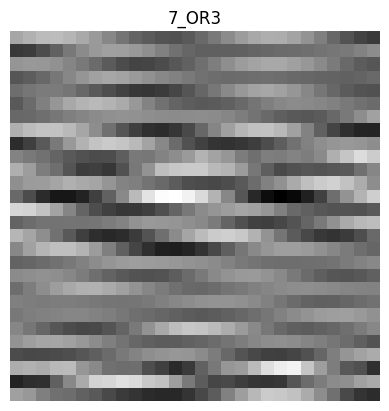

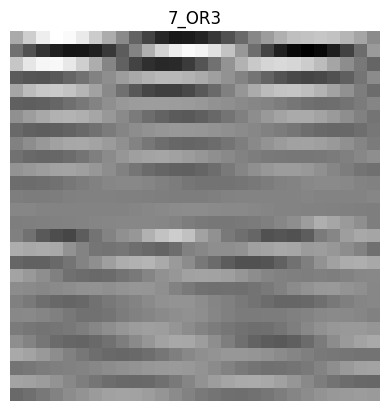

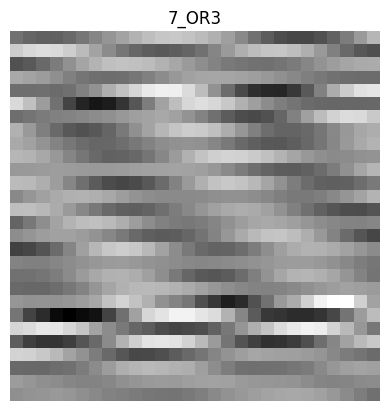

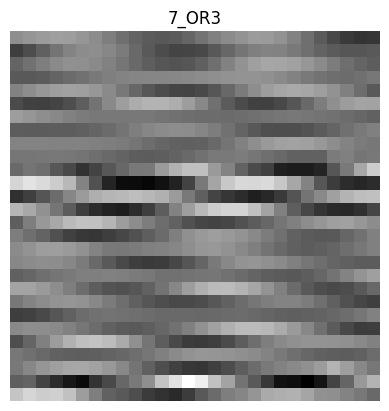

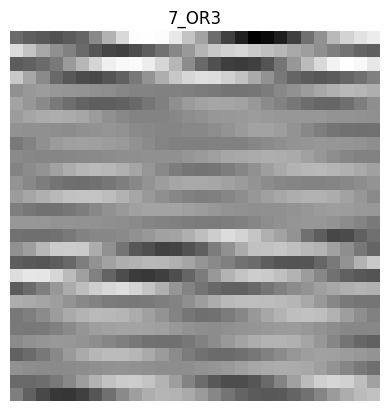

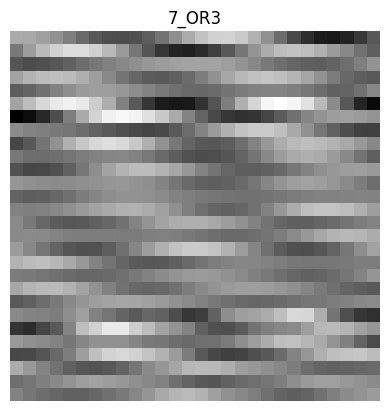

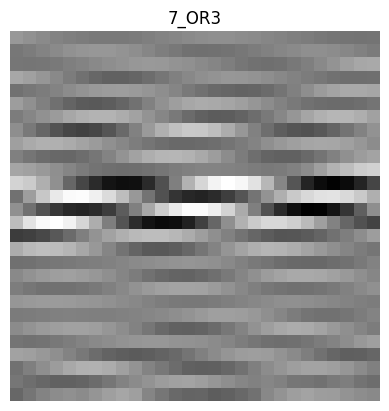

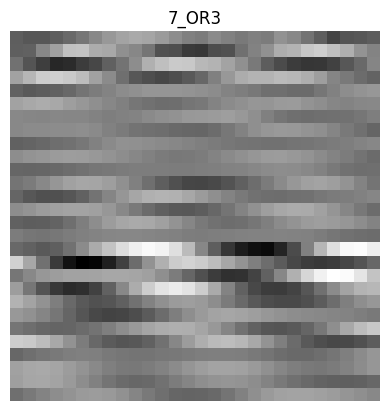

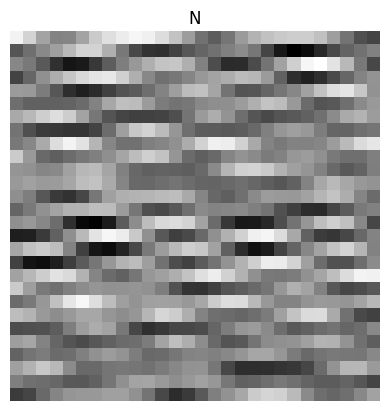

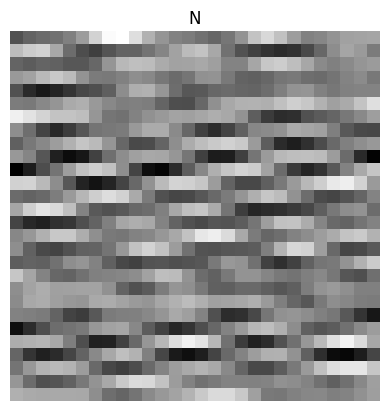

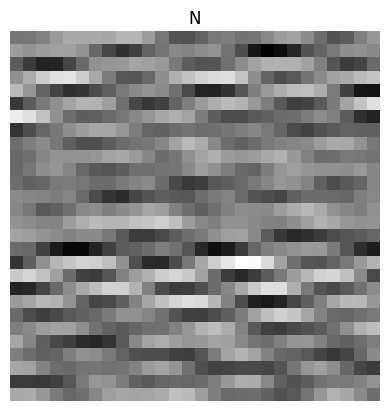

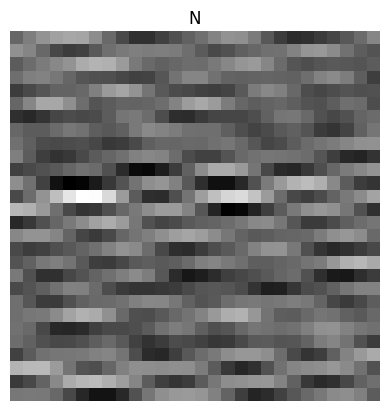

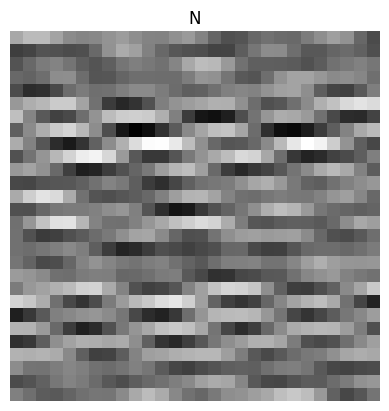

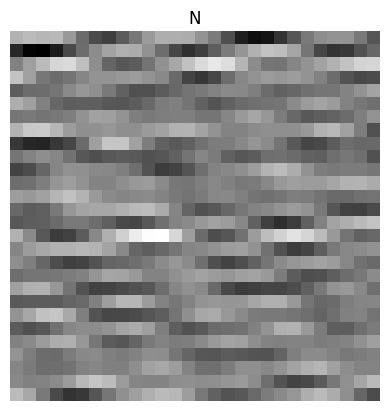

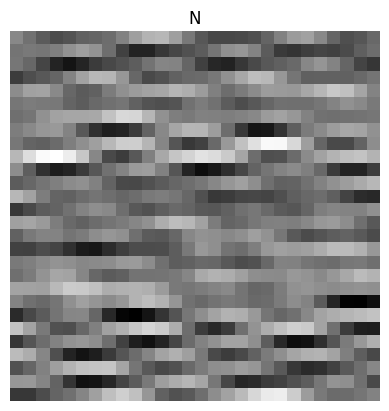

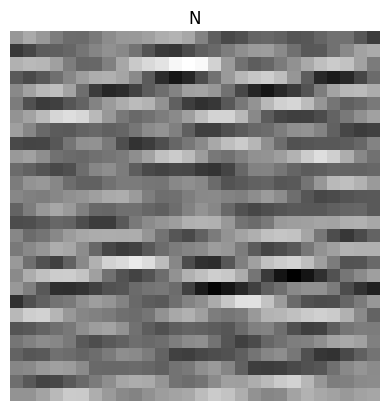

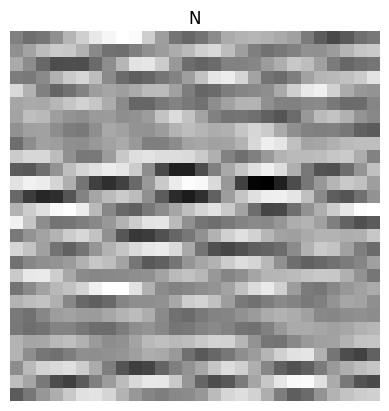

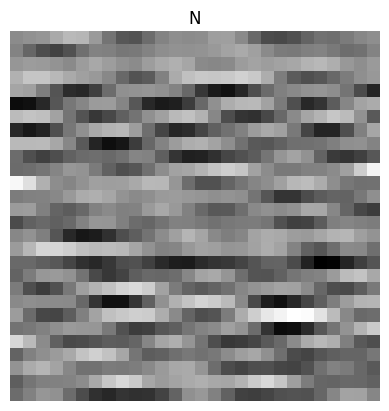

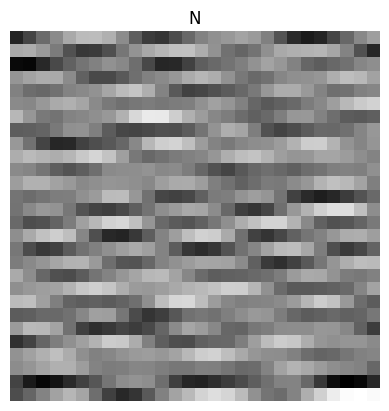

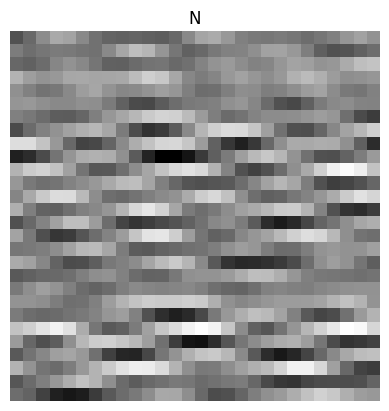

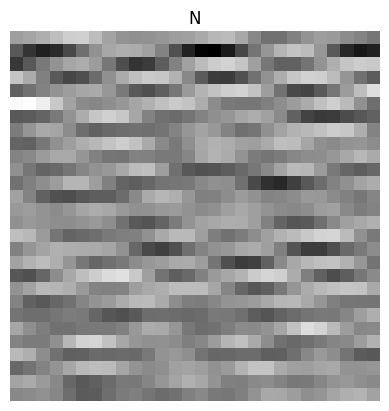

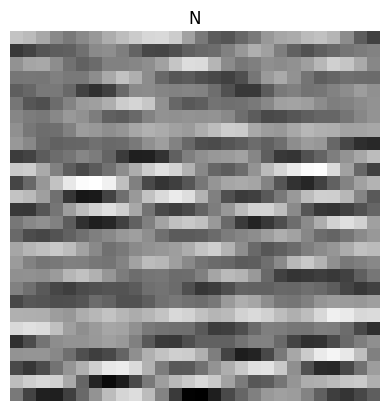

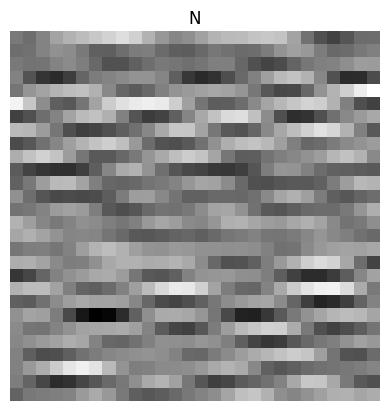

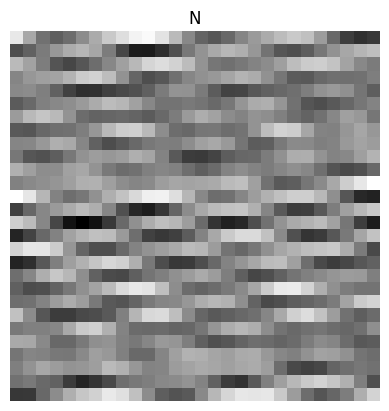

In [7]:
from matplotlib.pyplot import imread


for idx in range(0,9244,50):
    img=X[idx]

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(Y[idx])
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,OHE_Y,test_size=0.2,shuffle=True)


In [9]:
# X_pre_cnn = X.reshape(X.shape[0],X.shape[1]*X.shape[2])

# from sklearn.manifold import TSNE

# X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(X_pre_cnn)

# tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['t-SNE component 1', 't-SNE component 2'])

# tSNEdf['Fault']=Y


# # Plot the PC-1 and PC-2
# fig, ax = plt.subplots(figsize=(7,7))
# sns.scatterplot(x=tSNEdf['t-SNE component 1'],y=tSNEdf['t-SNE component 2'],hue='Fault',
#     data=tSNEdf,
#     legend="full",
#     alpha=0.3)
# plt.show()

In [10]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



# from tensorflow.keras.models import load_model
# cnn_model = load_model(r'H:\Gear Fault\Trained Model\CNN_model_gear.h5')



no_classes = len(df['fault'].unique())

cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(20, 3),activation='relu',input_shape=(X.shape[1],X.shape[2],1),padding='same'))

cnn_model.add(MaxPooling2D((20, 2),strides=(5, 5),padding='same'))

cnn_model.add(Conv2D(64, (10, 3), activation='relu',padding='same'))

cnn_model.add(MaxPooling2D(pool_size=(10, 2),strides=(3, 3),padding='same'))

# cnn_model.add(Conv2D(128, (5, 3), activation='relu',padding='same'))
                 
# cnn_model.add(MaxPooling2D(pool_size=(5, 2),strides=(3, 3),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))
            
cnn_model.add(Dense(no_classes, activation='softmax'))

cnn_model.summary()

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        1952      
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 6, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          61504     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [11]:
batch_size = 400
epochs = 20
history = cnn_model.fit(X_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test),shuffle=True)

Epoch 1/20
19/19 [==============================] - 4s 26ms/step - loss: 2.2097 - accuracy: 0.2489 - val_loss: 1.8146 - val_accuracy: 0.4708
Epoch 2/20
19/19 [==============================] - 0s 8ms/step - loss: 1.4634 - accuracy: 0.5479 - val_loss: 1.1571 - val_accuracy: 0.6351
Epoch 3/20
19/19 [==============================] - 0s 8ms/step - loss: 0.9106 - accuracy: 0.7915 - val_loss: 0.6841 - val_accuracy: 0.8503
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 0.5120 - accuracy: 0.8809 - val_loss: 0.3822 - val_accuracy: 0.8919
Epoch 5/20
19/19 [==============================] - 0s 8ms/step - loss: 0.3065 - accuracy: 0.9164 - val_loss: 0.2675 - val_accuracy: 0.9151
Epoch 6/20
19/19 [==============================] - 0s 8ms/step - loss: 0.2233 - accuracy: 0.9343 - val_loss: 0.2157 - val_accuracy: 0.9411
Epoch 7/20
19/19 [==============================] - 0s 8ms/step - loss: 0.1706 - accuracy: 0.9520 - val_loss: 0.1599 - val_accuracy: 0.9546
Epoch 8/20
19/19 [=

58/58 [==============================] - 0s 2ms/step


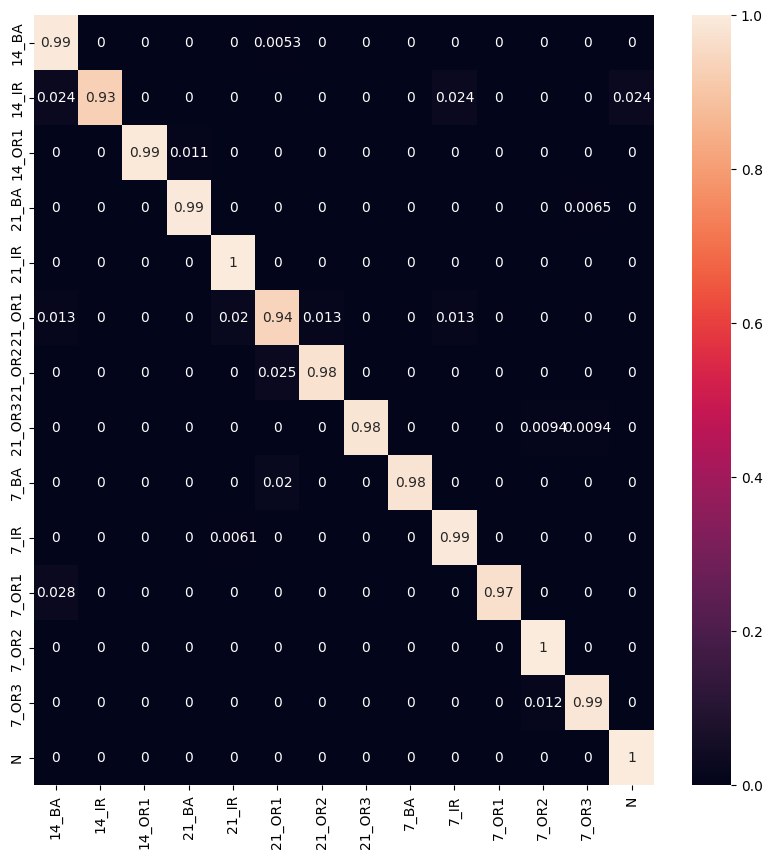

In [12]:
def inv_Transform_result(y_pred):    
    y_pred = y_pred.argmax(axis=1)
    y_pred = encoder.inverse_transform(y_pred)
    return y_pred



y_pred=cnn_model.predict(X_test)


Y_pred=inv_Transform_result(y_pred)
Y_test = inv_Transform_result(y_test)




from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10,10))
cm = confusion_matrix(Y_test, Y_pred,normalize='true')
f = sns.heatmap(cm, annot=True,xticklabels=encoder.classes_,yticklabels=encoder.classes_)
plt.show()

In [13]:
dummy_cnn = Model(inputs=cnn_model.input,outputs=cnn_model.layers[5].output)
y_viz = dummy_cnn.predict(X_train)

232/232 [==============================] - 0s 1ms/step


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7396 samples in 0.001s...
[t-SNE] Computed neighbors for 7396 samples in 0.471s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7396
[t-SNE] Computed conditional probabilities for sample 2000 / 7396
[t-SNE] Computed conditional probabilities for sample 3000 / 7396
[t-SNE] Computed conditional probabilities for sample 4000 / 7396
[t-SNE] Computed conditional probabilities for sample 5000 / 7396
[t-SNE] Computed conditional probabilities for sample 6000 / 7396
[t-SNE] Computed conditional probabilities for sample 7000 / 7396
[t-SNE] Computed conditional probabilities for sample 7396 / 7396
[t-SNE] Mean sigma: 1.362693
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.587910
[t-SNE] KL divergence after 300 iterations: 1.878855


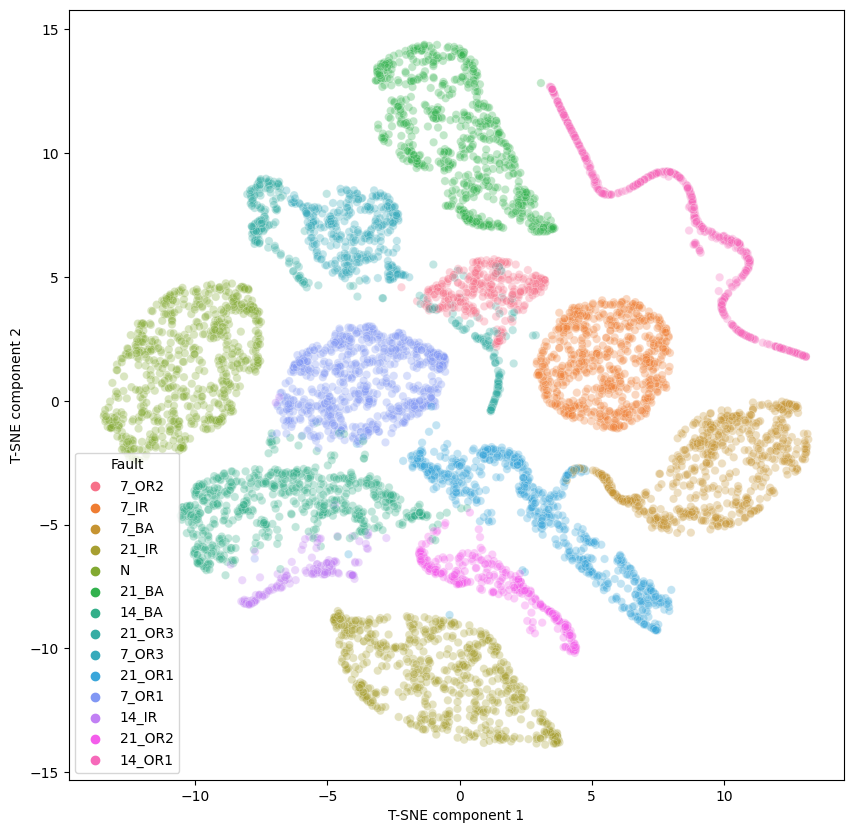

In [14]:
from sklearn.manifold import TSNE

X_t_sne = TSNE(n_components=2, learning_rate='auto',verbose=1, perplexity=40, n_iter=300).fit_transform(y_viz)

tSNEdf = pd.DataFrame(data = X_t_sne, columns = ['T-SNE component 1', 'T-SNE component 2'])

tSNEdf['Fault']=inv_Transform_result(y_train)


# Plot the PC-1 and PC-2
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x=tSNEdf['T-SNE component 1'],y=tSNEdf['T-SNE component 2'],hue='Fault',
    data=tSNEdf,
    legend="full",
    alpha=0.3)
plt.show()

In [15]:
-

SyntaxError: invalid syntax (476313318.py, line 1)